<a href="https://colab.research.google.com/github/anggaangoro3/data-science-project/blob/main/Jakarta_land_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# Cell 1: Mount Drive dan Import Libraries
# Google Colab
from google.colab import drive

# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import OneHotEncoder
import xgboost as xgb
import lightgbm as lgb
import joblib
import pickle
import re
import time
import warnings
warnings.filterwarnings('ignore')


# Settings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
# Cell 2: Load Data
merged_df = pd.read_csv('/content/drive/MyDrive/Rumah123_dataset/GABUNGAN_FINAL_DATASET.csv')
merged_df = merged_df.reset_index()
merged_df = merged_df.rename(columns={'index': 'NO'})

print(f"Total baris: {merged_df.shape[0]}")
print(f"Total kolom: {merged_df.shape[1]}")
display(merged_df.head(15))

Total baris: 2398
Total kolom: 14


,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
0,0,las8899959,Dijual Kavling Pulau Opak New Cluster Permata ...,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,Tanah,Dijual,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana,For sale di wilayah yang tenang. Dengan katego...
1,1,Dijual,Kemang Pejaten Barat Raya Nempel Njop Bisa Ban...,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,Ada,Tanah,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,Lahan Kosong di Jalan Pejaten Barat Raya bisa ...
2,2,las8971423,DI JUAL TANAH KOMERSIL TEPI JALAN CAWANG,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,Tanah,Dijual,"Cawang, Jakarta Timur",Jakarta Timur,Cawang,"DI Jual Tanah di Cawang, Jakarta Timur.\n\n- S..."
3,3,las8706550,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
4,4,las8706566,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
5,5,Dijual,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,NaN,25x15 m,Tanah,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
6,6,las8706558,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),Lainnya,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
7,7,las4269281,Super Best Deal Tanah Komersial Cbd Pik 2. Bis...,Rp 191 Miliar Total,Rp 50 Juta /m²,3825 m² (66x65m),HGB,66x65 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,"KAVLING KOMERSIAL CBD PIK 2, SATU-SATUNYA KAVL..."
8,8,las8835998,DIJUAL TANAH KAVLING LOKASI STRATEGIS DI GADIN...,"Rp 4,28 Miliar Total",Rp 28 Juta /m²,153 m²,HGB,NaN,Tanah,Dijual,"Kelapa Gading, Jakarta Utara",Jakarta Utara,Kelapa Gading,Dijual Kavling \nGading Kirana \n\nLuas tanah ...
9,9,las8941868,"Dijual Tanah Murah Bisa Buat Kantor,ruang Usah...","Rp 15,4 Miliar Total",NaN,543 m² (30x19m),SHM,30x19 m,Tanah,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,"Dijual Tanah Murah Bisa Buat Kantor,Ruang Usah..."


In [54]:
# Cell 3: Periksa dan Hapus Baris dengan URL
mask_rumah123_in_sku = merged_df['Place_name_0'].astype(str).str.contains('www.rumah123.com', na=False)
rows_with_rumah123_in_sku = merged_df[mask_rumah123_in_sku]

print(f"Jumlah baris dengan 'www.rumah123' di 'Place_name_0': {len(rows_with_rumah123_in_sku)}")

if len(rows_with_rumah123_in_sku) > 0:
    print("\n10 contoh baris:")
    display(rows_with_rumah123_in_sku.head(10))
    print("\nDropping rows with 'www.rumah123' in 'Place_name_0'...")
    merged_df = merged_df[~mask_rumah123_in_sku].reset_index(drop=True)
    merged_df['NO'] = merged_df.index
    print(f"New total rows: {len(merged_df)}")
else:
    print("\nTidak ada baris yang ditemukan dengan 'www.rumah123' di 'Place_name_0'.")

Jumlah baris dengan 'www.rumah123' di 'Place_name_0': 23

10 contoh baris:


,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
882,882,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
883,883,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1060,1060,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1061,1061,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1067,1067,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1068,1068,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1069,1069,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1272,1272,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1273,1273,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1274,1274,NaN,www.rumah123.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dropping rows with 'www.rumah123' in 'Place_name_0'...
New total rows: 2375


In [55]:
# Cell 4: Koreksi Posisi Nilai Kolom (Langkah 1)
# Pindahkan nilai dari 'Ad_Type_0' ke 'Product_sku_0' jika cocok dengan pola 'lasXXXXXX'
mask = merged_df['Ad_Type_0'].astype(str).str.match(r'^las\d{6}$')
merged_df.loc[mask, 'Product_sku_0'] = merged_df.loc[mask, 'Ad_Type_0']
merged_df.loc[mask, 'Ad_Type_0'] = None

# Tampilkan jumlah total baris dan kolom
print(f"Total baris setelah langkah 1: {merged_df.shape[0]}")
print(f"Total kolom setelah langkah 1: {merged_df.shape[1]}")
display(merged_df.head(15))

Total baris setelah langkah 1: 2375
Total kolom setelah langkah 1: 14


,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
0,0,las8899959,Dijual Kavling Pulau Opak New Cluster Permata ...,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,Tanah,Dijual,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana,For sale di wilayah yang tenang. Dengan katego...
1,1,Dijual,Kemang Pejaten Barat Raya Nempel Njop Bisa Ban...,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,Ada,Tanah,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,Lahan Kosong di Jalan Pejaten Barat Raya bisa ...
2,2,las8971423,DI JUAL TANAH KOMERSIL TEPI JALAN CAWANG,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,Tanah,Dijual,"Cawang, Jakarta Timur",Jakarta Timur,Cawang,"DI Jual Tanah di Cawang, Jakarta Timur.\n\n- S..."
3,3,las8706550,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
4,4,las8706566,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
5,5,Dijual,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,NaN,25x15 m,Tanah,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
6,6,las8706558,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),Lainnya,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
7,7,las4269281,Super Best Deal Tanah Komersial Cbd Pik 2. Bis...,Rp 191 Miliar Total,Rp 50 Juta /m²,3825 m² (66x65m),HGB,66x65 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,"KAVLING KOMERSIAL CBD PIK 2, SATU-SATUNYA KAVL..."
8,8,las8835998,DIJUAL TANAH KAVLING LOKASI STRATEGIS DI GADIN...,"Rp 4,28 Miliar Total",Rp 28 Juta /m²,153 m²,HGB,NaN,Tanah,Dijual,"Kelapa Gading, Jakarta Utara",Jakarta Utara,Kelapa Gading,Dijual Kavling \nGading Kirana \n\nLuas tanah ...
9,9,las8941868,"Dijual Tanah Murah Bisa Buat Kantor,ruang Usah...","Rp 15,4 Miliar Total",NaN,543 m² (30x19m),SHM,30x19 m,Tanah,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,"Dijual Tanah Murah Bisa Buat Kantor,Ruang Usah..."


In [56]:
# Cell 5: Koreksi Posisi Nilai Kolom (Langkah 2 - Perbaikan Lanjutan)
# Konversi ke string untuk keamanan
merged_df['Ad_Type_0'] = merged_df['Ad_Type_0'].astype(str)
merged_df['Product_sku_0'] = merged_df['Product_sku_0'].astype(str)

# Ganti 'nan' string kembali ke NaN jika diperlukan nanti (opsional)
# Tapi untuk logika ini, kita biarkan sebagai string sementara

# Buat masker untuk baris yang salah tempat:
# Kasus 1: Ad_Type_0 berisi 'las' + angka → seharusnya di Product_sku_0
mask_ad_has_las = merged_df['Ad_Type_0'].str.match(r'^las\d+$')

# Kasus 2: Product_sku_0 berisi 'Dijual' atau 'Disewa' → seharusnya di Ad_Type_0
mask_sku_has_adtype = merged_df['Product_sku_0'].str.contains(r'^(Dijual|Disewa)$', na=False)

# Kita akan tukar nilai hanya pada baris yang memenuhi SALAH SATU (atau keduanya)
# Tapi agar aman, lakukan tukar hanya jika pola salah tempat terdeteksi

# Simpan nilai lama
temp_sku = merged_df['Product_sku_0'].copy()
temp_ad = merged_df['Ad_Type_0'].copy()

# Jika Ad_Type_0 berisi 'lasXXXXXX', pindahkan ke Product_sku_0
merged_df.loc[mask_ad_has_las, 'Product_sku_0'] = temp_ad[mask_ad_has_las]

# Jika Product_sku_0 berisi 'Dijual'/'Disewa', pindahkan ke Ad_Type_0
merged_df.loc[mask_sku_has_adtype, 'Ad_Type_0'] = temp_sku[mask_sku_has_adtype]

# Opsional: Bersihkan nilai 'nan' string kembali ke NaN
merged_df['Ad_Type_0'] = merged_df['Ad_Type_0'].replace('nan', np.nan)
merged_df['Product_sku_0'] = merged_df['Product_sku_0'].replace('nan', np.nan)

display(merged_df.head(15))

,NO,Product_sku_0,Place_name_0,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Property_Type_0,Ad_Type_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Product_description_0
0,0,las8899959,Dijual Kavling Pulau Opak New Cluster Permata ...,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,Tanah,Dijual,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana,For sale di wilayah yang tenang. Dengan katego...
1,1,Dijual,Kemang Pejaten Barat Raya Nempel Njop Bisa Ban...,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,Ada,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,Lahan Kosong di Jalan Pejaten Barat Raya bisa ...
2,2,las8971423,DI JUAL TANAH KOMERSIL TEPI JALAN CAWANG,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,Tanah,Dijual,"Cawang, Jakarta Timur",Jakarta Timur,Cawang,"DI Jual Tanah di Cawang, Jakarta Timur.\n\n- S..."
3,3,las8706550,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
4,4,las8706566,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
5,5,Dijual,Kavling Hoek Di Cluster The Piano at Golf Isla...,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,NaN,25x15 m,Dijual,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
6,6,las8706558,Kavling Di Cluster The Piano at Golf Island PI...,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),Lainnya,25x10 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,Pantai Indah Kapuk PIK Golf Island\nCluster Th...
7,7,las4269281,Super Best Deal Tanah Komersial Cbd Pik 2. Bis...,Rp 191 Miliar Total,Rp 50 Juta /m²,3825 m² (66x65m),HGB,66x65 m,Tanah,Dijual,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2,"KAVLING KOMERSIAL CBD PIK 2, SATU-SATUNYA KAVL..."
8,8,las8835998,DIJUAL TANAH KAVLING LOKASI STRATEGIS DI GADIN...,"Rp 4,28 Miliar Total",Rp 28 Juta /m²,153 m²,HGB,NaN,Tanah,Dijual,"Kelapa Gading, Jakarta Utara",Jakarta Utara,Kelapa Gading,Dijual Kavling \nGading Kirana \n\nLuas tanah ...
9,9,las8941868,"Dijual Tanah Murah Bisa Buat Kantor,ruang Usah...","Rp 15,4 Miliar Total",NaN,543 m² (30x19m),SHM,30x19 m,Tanah,Dijual,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang,"Dijual Tanah Murah Bisa Buat Kantor,Ruang Usah..."


In [57]:
# Cell 6: Deteksi dan Hapus Duplikat
key_columns = [
    'Place_name_0',
    'Total_Price_0',
    'Land_Area_0',
    'Place_PostalAddress_addressLocality_0',
    'Property_Type_0',
    'Land_Dimensions_0'
]

# Identifikasi baris duplikat berdasarkan kolom kunci (termasuk duplikat pertama)
duplicated_mask = merged_df.duplicated(subset=key_columns, keep=False)

# Filter baris yang duplikat
duplicated_rows = merged_df[duplicated_mask].copy()

# Urutkan agar duplikat berdekatan
duplicated_rows = duplicated_rows.sort_values(by=key_columns)

# Tampilkan jumlah duplikat
print(f"Total baris duplikat: {len(duplicated_rows)}")

# Tampilkan 20 contoh baris duplikat
print("\n20 contoh baris duplikat:")
print(duplicated_rows.head(20)[['NO'] + key_columns])

# === Lanjutan dari kode deteksi duplikat ===

# Hapus duplikat berdasarkan kolom kunci, simpan hanya baris pertama dari setiap grup
print("\nMenghapus baris duplikat...")

# Simpan jumlah sebelum
jumlah_sebelum = len(merged_df)

# Hapus duplikat
merged_df = merged_df.drop_duplicates(subset=key_columns, keep='first').reset_index(drop=True)

# Perbarui kolom 'NO' agar berurutan dari 0 tanpa bentrok
if 'NO' in merged_df.columns:
    merged_df = merged_df.drop(columns=['NO'])
merged_df.insert(0, 'NO', range(len(merged_df)))

# Tampilkan ringkasan
jumlah_sesudah = len(merged_df)
print(f" Duplikat berhasil dihapus.")
print(f"Jumlah baris sebelum: {jumlah_sebelum}")
print(f"Jumlah baris setelah:  {jumlah_sesudah}")
print(f"Jumlah baris dihapus:  {jumlah_sebelum - jumlah_sesudah}")

Total baris duplikat: 1212

20 contoh baris duplikat:
        NO                                       Place_name_0  \
817    817  #langka# Tanah Cocok Untuk Rumah Mewah Sebrang...   
1109  1109  #langka# Tanah Cocok Untuk Rumah Mewah Sebrang...   
109    109  ( Tanah Kavling Dalam Komplek Dekat pintu Toll...   
1723  1723  ( Tanah Kavling Dalam Komplek Dekat pintu Toll...   
108    108  ( Tanah Kavling Siap Bangun Dalam Cluster ting...   
1722  1722  ( Tanah Kavling Siap Bangun Dalam Cluster ting...   
1235  1235  *TERMURAHHHH.... PINGGIR JALAN KAPUK, Jual cep...   
1244  1244  *TERMURAHHHH.... PINGGIR JALAN KAPUK, Jual cep...   
1344  1344  A199 Jual Dibawah NJOP Tanah Komersil di Jalan...   
1350  1350  A199 Jual Dibawah NJOP Tanah Komersil di Jalan...   
1289  1289  A21 Jual Tanah Murah di Tomang Cocok Untuk Tin...   
1296  1296  A21 Jual Tanah Murah di Tomang Cocok Untuk Tin...   
1345  1345  A22 Tanah Dijual Termurah di Duri Kepa Dkt Tan...   
1351  1351  A22 Tanah Dijual Termura

In [58]:
# Cell 7: Drop Kolom Tidak Perlu dan Cek Missing Values
#Tambhkan periksa diatas sini
merged_df = merged_df.drop(columns=['Place_name_0', 'Product_sku_0', 'Property_Type_0', 'Ad_Type_0', 'Product_description_0'])
display(merged_df.head())

# Periksa missing value pada kolom yang diminta
columns_to_check = [
    'Total_Price_0',
    'Price_per_meter_0',
    'Land_Area_0',
    'Certificate_0',
    'Land_Dimensions_0',
    'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3'
]

print("\nMissing values per column:")
print(merged_df[columns_to_check].isnull().sum())

,NO,Total_Price_0,Price_per_meter_0,Land_Area_0,Certificate_0,Land_Dimensions_0,Place_PostalAddress_addressLocality_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3
0,0,"Rp 4,75 Miliar Total",Rp 33 Juta /m²,144 m² (18x8m),PPJB,18x8 m,"Permata Buana, Jakarta Barat",Jakarta Barat,Permata Buana
1,1,"Rp 47,3 Miliar Total","Rp 18,5 Juta /m²",2561 m² (90x28m),SHM,90x28 m,"Kemang, Jakarta Selatan",Jakarta Selatan,Kemang
2,2,Rp 17 Miliar Total,NaN,497 m²,SHM,NaN,"Cawang, Jakarta Timur",Jakarta Timur,Cawang
3,3,"Rp 6,25 Miliar Total",Rp 25 Juta /m²,250 m² (25x10m),PPJB,25x10 m,"Pantai Indah Kapuk, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk
4,4,"Rp 9,37 Miliar Total",Rp 25 Juta /m²,375 m² (25x15m),Lainnya,25x15 m,"Pantai Indah Kapuk 2, Jakarta Utara",Jakarta Utara,Pantai Indah Kapuk 2



Missing values per column:
Total_Price_0                       2
Price_per_meter_0                 709
Land_Area_0                         2
Certificate_0                       2
Land_Dimensions_0                 673
BreadcrumbList_ListItem_name_2      4
BreadcrumbList_ListItem_name_3      4
dtype: int64


In [59]:
# Cell 8: Handle Missing Values Wajib
# Kolom yang WAJIB tidak boleh NaN
required_columns = [
    'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3',
    'Land_Area_0',
    'Certificate_0'
]

# Simpan jumlah baris sebelum
before = len(merged_df)

# Hapus baris yang memiliki NaN di SALAH SATU kolom wajib
merged_df = merged_df.dropna(subset=required_columns).reset_index(drop=True)

# Perbarui kolom 'NO' agar tetap berurutan dari 0
if 'NO' in merged_df.columns:
    merged_df = merged_df.drop(columns=['NO'])
merged_df.insert(0, 'NO', range(len(merged_df)))

# Tampilkan ringkasan
after = len(merged_df)
print(f" Baris dengan missing value pada kolom wajib berhasil dihapus.")
print(f"Jumlah baris sebelum: {before}")
print(f"Jumlah baris setelah:  {after}")
print(f"Jumlah baris dihapus:  {before - after}")

# Periksa ulang missing value pada kolom tersebut (harus 0)
print("\nMissing values setelah pembersihan:")
print(merged_df[required_columns].isnull().sum())

 Baris dengan missing value pada kolom wajib berhasil dihapus.
Jumlah baris sebelum: 1675
Jumlah baris setelah:  1671
Jumlah baris dihapus:  4

Missing values setelah pembersihan:
BreadcrumbList_ListItem_name_2    0
BreadcrumbList_ListItem_name_3    0
Land_Area_0                       0
Certificate_0                     0
dtype: int64


In [60]:
# Cell 9: Koreksi Data Lokasi Spesifik
"""
Ubah:
'NO':'922','BreadcrumbList_ListItem_name_2': 'Jakarta Utara' , 'BreadcrumbList_ListItem_name_3': 'Tanjung Priok',
'NO':'923','BreadcrumbList_ListItem_name_2': 'Jakarta Selatan' , 'BreadcrumbList_ListItem_name_3': 'Kebayoran Baru',
'NO':'1461','BreadcrumbList_ListItem_name_2': 'Jakarta Utara' , 'BreadcrumbList_ListItem_name_3': 'Pancoran',
'NO':'1465','BreadcrumbList_ListItem_name_2': 'Jakarta Selatan' , 'BreadcrumbList_ListItem_name_3': 'Setiabudi',
"""
# Perbaiki data lokasi untuk baris-baris spesifik yang disebutkan
location_corrections = {
    922: {'BreadcrumbList_ListItem_name_2': 'Jakarta Utara', 'BreadcrumbList_ListItem_name_3': 'Tanjung Priok'},
    923: {'BreadcrumbList_ListItem_name_2': 'Jakarta Selatan', 'BreadcrumbList_ListItem_name_3': 'Kebayoran Baru'},
    1461: {'BreadcrumbList_ListItem_name_2': 'Jakarta Selatan', 'BreadcrumbList_ListItem_name_3': 'Pancoran'},
    1463: {'BreadcrumbList_ListItem_name_2': 'Jakarta Utara', 'BreadcrumbList_ListItem_name_3': 'Ancol'},
    1465: {'BreadcrumbList_ListItem_name_2': 'Jakarta Selatan', 'BreadcrumbList_ListItem_name_3': 'Setiabudi'}
}

# Terapkan koreksi untuk setiap baris
for no, correction in location_corrections.items():
    mask = merged_df['NO'] == no
    if mask.any():
        merged_df.loc[mask, 'BreadcrumbList_ListItem_name_2'] = correction['BreadcrumbList_ListItem_name_2']
        merged_df.loc[mask, 'BreadcrumbList_ListItem_name_3'] = correction['BreadcrumbList_ListItem_name_3']
        print(f"✅ Koreksi diterapkan untuk baris NO={no}")

✅ Koreksi diterapkan untuk baris NO=922
✅ Koreksi diterapkan untuk baris NO=923
✅ Koreksi diterapkan untuk baris NO=1461
✅ Koreksi diterapkan untuk baris NO=1463
✅ Koreksi diterapkan untuk baris NO=1465


In [61]:
# Cell 10: Ekstrak Nilai Numerik dan Hitung Harga per Meter
def extract_total_price(price_str):
    """
    Ekstrak nilai numerik dari string harga dengan handle semua satuan:
    - Triliun (1 triliun = 1.000.000 juta)
    - Miliar (1 miliar = 1.000 juta)
    - Juta
    """
    if pd.isna(price_str) or price_str in ['', ' ', 'nan', 'NaN']:
        return np.nan

    # Konversi ke string dan normalisasi format
    price_str = str(price_str).strip().replace(',', '.').replace('rp', 'Rp')

    # Cari nilai numerik (bisa mengandung titik desimal)
    num_match = re.search(r'[\d.]+', price_str)
    if not num_match:
        return np.nan

    try:
        # Ekstrak dan konversi ke float
        num_value = float(num_match.group())

        # Handle satuan yang berbeda
        price_lower = price_str.lower()

        if 'triliun' in price_lower or 'trilyun' in price_lower:
            # 1 triliun = 1.000.000 juta
            return num_value * 1_000_000

        elif 'miliar' in price_lower:
            # 1 miliar = 1.000 juta
            return num_value * 1_000

        elif 'juta' in price_lower:
            return num_value

        else:
            # Jika tidak ada satuan yang disebutkan, asumsikan juta
            # atau coba deteksi dari konteks angka besar
            if num_value >= 1000:
                # Angka besar kemungkinan dalam juta (misal: 35256 = 35.256 Miliar)
                return num_value * 1000  # konversi ke juta
            return num_value

    except (ValueError, TypeError):
        return np.nan

def extract_land_area(area_str):
    """Ekstrak nilai numerik dari luas tanah"""
    if pd.isna(area_str):
        return np.nan

    area_str = str(area_str).lower().strip()

    # Handle format "2561 m² (90x28m)"
    if '(' in area_str:
        area_str = area_str.split('(')[0].strip()

    num_match = re.search(r'[\d.]+', area_str)
    if not num_match:
        return np.nan

    try:
        return float(num_match.group().replace(',', '.'))
    except (ValueError, TypeError):
        return np.nan

# Buat kolom numerik baru dengan fungsi yang sudah diperbaiki
merged_df['Total_Price_Juta'] = merged_df['Total_Price_0'].apply(extract_total_price)
merged_df['Land_Area_m2'] = merged_df['Land_Area_0'].apply(extract_land_area)

# Hitung ulang price per meter
merged_df['Price_per_meter_Juta'] = merged_df['Total_Price_Juta'] / merged_df['Land_Area_m2']

# Hapus baris yang tidak bisa dihitung
merged_df = merged_df.dropna(subset=['Total_Price_Juta', 'Land_Area_m2']).reset_index(drop=True)

# Validasi hasil
print("✅ Fungsi sudah bisa handle harga triliun!")
print(f"Range harga (juta): {merged_df['Total_Price_Juta'].min():,.0f} - {merged_df['Total_Price_Juta'].max():,.0f}")
print(f"Contoh harga triliun yang terkonversi:")
triliun_samples = merged_df[merged_df['Total_Price_0'].str.contains('Triliun', case=False, na=False)]
if not triliun_samples.empty:
    for idx, row in triliun_samples.head(3).iterrows():
        print(f"  {row['Total_Price_0']} → {row['Total_Price_Juta']:,.0f} juta")
else:
    print("  Tidak ada data 'Triliun' yang ditemukan dalam sampel")

✅ Fungsi sudah bisa handle harga triliun!
Range harga (juta): 3 - 73,536,000,000
Contoh harga triliun yang terkonversi:
  Rp 73536 Triliun Total → 73,536,000,000 juta
  Rp 1,17 Triliun Total → 1,170,000 juta
  Rp 1,1 Triliun Total → 1,100,000 juta


In [62]:
# Cell 11: Drop Kolom Redundan dan Kolom Tambahan
# Hapus kolom Land_Dimensions_0 yang memiliki terlalu banyak missing values
merged_df = merged_df.drop(columns=['Land_Dimensions_0'])

print("✅ Kolom 'Land_Dimensions_0' berhasil dihapus karena:")
print("- Missing rate sangat tinggi (40.2%)")
print("- Redundan dengan kolom 'Land_Area_0'")
print("- Tidak signifikan untuk prediksi harga tanah Jakarta")

# Drop kolom yang diminta
columns_to_drop = [
    'Price_per_meter_0',
    'Land_Area_0',
    'Place_PostalAddress_addressLocality_0'
]

merged_df = merged_df.drop(columns=columns_to_drop)

print("Kolom berhasil dihapus:")
print(columns_to_drop)
display(merged_df.head(60))

✅ Kolom 'Land_Dimensions_0' berhasil dihapus karena:
- Missing rate sangat tinggi (40.2%)
- Redundan dengan kolom 'Land_Area_0'
- Tidak signifikan untuk prediksi harga tanah Jakarta
Kolom berhasil dihapus:
['Price_per_meter_0', 'Land_Area_0', 'Place_PostalAddress_addressLocality_0']


,NO,Total_Price_0,Certificate_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
0,0,"Rp 4,75 Miliar Total",PPJB,Jakarta Barat,Permata Buana,4.750000e+03,144.0,32.986111
1,1,"Rp 47,3 Miliar Total",SHM,Jakarta Selatan,Kemang,4.730000e+04,2561.0,18.469348
2,2,Rp 17 Miliar Total,SHM,Jakarta Timur,Cawang,1.700000e+04,497.0,34.205231
3,3,"Rp 6,25 Miliar Total",PPJB,Jakarta Utara,Pantai Indah Kapuk,6.250000e+03,250.0,25.000000
4,4,"Rp 9,37 Miliar Total",Lainnya,Jakarta Utara,Pantai Indah Kapuk 2,9.370000e+03,375.0,24.986667
5,5,"Rp 9,37 Miliar Total",Lainnya,Jakarta Utara,Pantai Indah Kapuk,9.370000e+03,375.0,24.986667
6,6,"Rp 6,25 Miliar Total",Lainnya,Jakarta Utara,Pantai Indah Kapuk 2,6.250000e+03,250.0,25.000000
7,7,Rp 191 Miliar Total,HGB,Jakarta Utara,Pantai Indah Kapuk 2,1.910000e+05,3825.0,49.934641
8,8,"Rp 4,28 Miliar Total",HGB,Jakarta Utara,Kelapa Gading,4.280000e+03,153.0,27.973856
9,9,"Rp 15,4 Miliar Total",SHM,Jakarta Selatan,Kemang,1.540000e+04,543.0,28.360958


Menampilkan 84 baris dengan harga total dalam jutaan:


,NO,Total_Price_0,Certificate_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
29,29,Rp 300 Juta Total,SHM,Jakarta Timur,Cipayung,300.0,60.0,5.000000
44,44,Rp 15 Juta Total,SHM,Jakarta Selatan,Kemang,15.0,20000.0,0.000750
45,45,Rp 46 Juta Total,SHM,Jakarta Utara,Kelapa Gading,46.0,280.0,0.164286
50,50,"Rp 22,5 Juta Total",SHM,Jakarta Utara,Pantai Indah Kapuk 2,22.5,200.0,0.112500
75,75,Rp 900 Juta Total,SHM,Jakarta Timur,Kramat Jati,900.0,111.0,8.108108
...,...,...,...,...,...,...,...,...
1564,1564,Rp 480 Juta,SHM,Jakarta Timur,Cilangkap,480.0,72.0,6.666667
1565,1565,Rp 489 Juta Total,SHM,Jakarta Timur,Cipayung,489.0,70.0,6.985714
1577,1577,Rp 950 Juta Total,HGB,Jakarta Timur,Cakung,950.0,102.0,9.313725
1605,1605,Rp 500 Juta Total,Akta Jual Beli,Jakarta Timur,Matraman,500.0,1000.0,0.500000


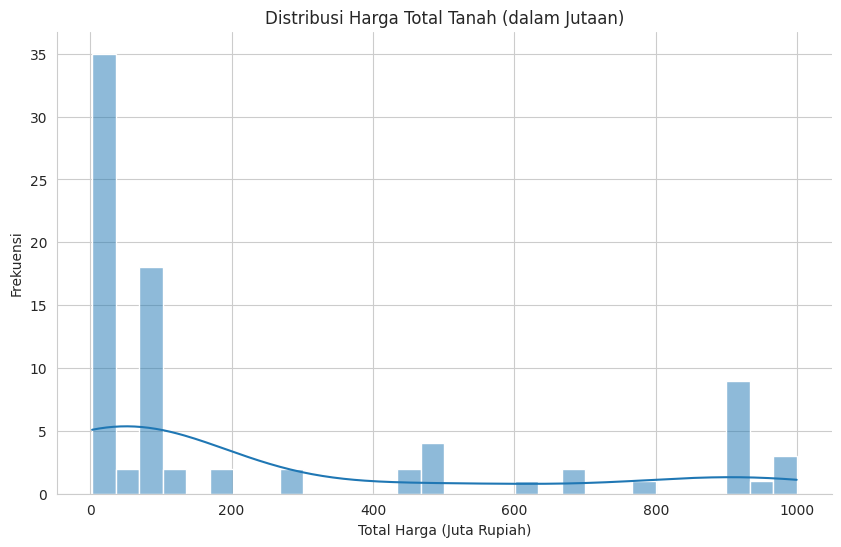

Statistik Deskriptif untuk Kolom Numerik:


,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
count,1.671000e+03,1671.000000,1671.000000
mean,4.431205e+07,2858.953321,652.924588
std,1.798921e+09,12750.668803,19672.023492
min,2.800000e+00,10.000000,0.000750
25%,4.300000e+03,250.000000,12.481304
50%,9.800000e+03,457.000000,20.000000
75%,2.800000e+04,1164.000000,27.500000
max,7.353600e+10,250000.000000,800000.000000



Distribusi Berdasarkan BreadcrumbList_ListItem_name_2 (dalam angka):
BreadcrumbList_ListItem_name_2
Jakarta Selatan    507
Jakarta Utara      443
Jakarta Barat      430
Jakarta Timur      216
Jakarta Pusat       75
Name: count, dtype: int64


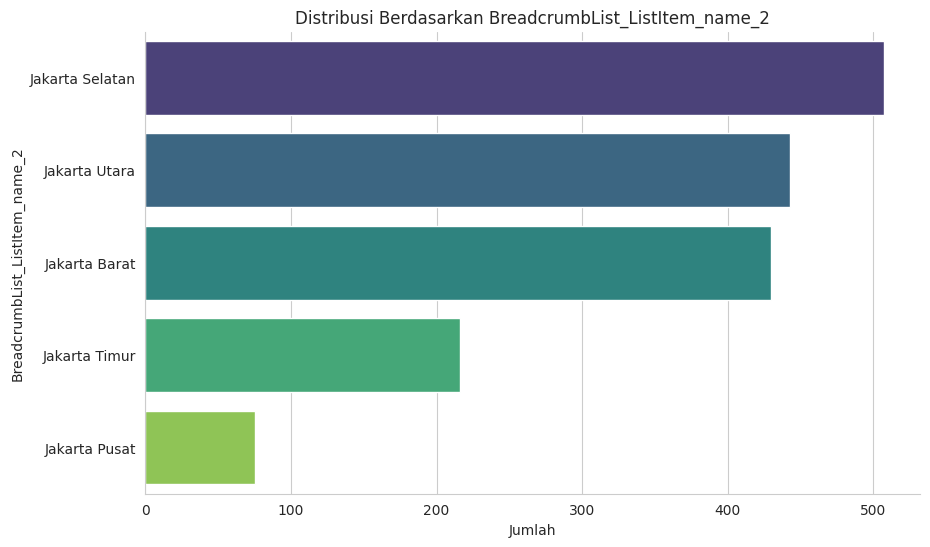


Distribusi Berdasarkan Certificate_0 (dalam angka):
Certificate_0
SHM               905
HGB               316
Lainnya           256
PPJB              174
Akta Jual Beli      9
Girik               5
Hak Pakai           4
HGU                 2
Name: count, dtype: int64


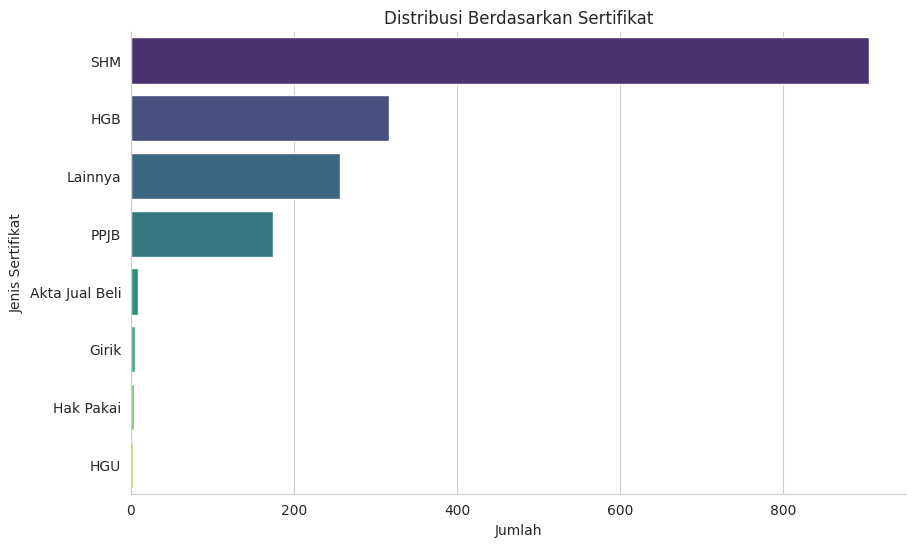

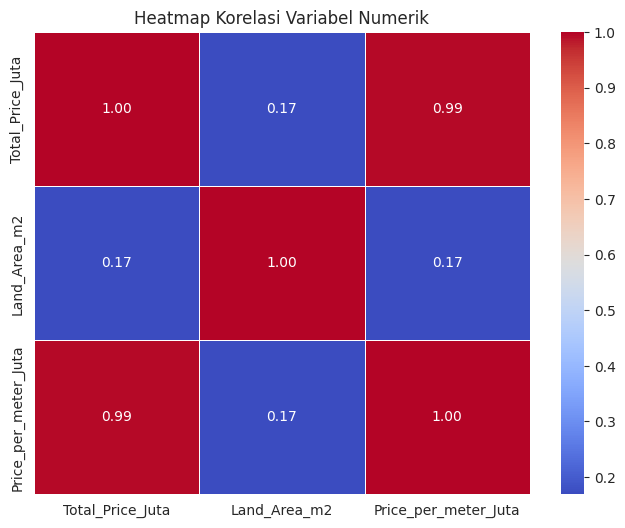

In [63]:
# Cell 12: EDA dan Visualisasi
# Tampilkan distribusi Total_Price_Juta dari jutaan_df (opsional, hanya jika ingin fokus pada harga jutaan)
jutaan_df = merged_df[merged_df['Total_Price_Juta'] < 1000].copy()
print(f"Menampilkan {len(jutaan_df)} baris dengan harga total dalam jutaan:")
display(jutaan_df)

plt.figure(figsize=(10, 6))
sns.histplot(jutaan_df['Total_Price_Juta'], kde=True, bins=30)
plt.title('Distribusi Harga Total Tanah (dalam Jutaan)')
plt.xlabel('Total Harga (Juta Rupiah)')
plt.ylabel('Frekuensi')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Tampilkan statistik deskriptif untuk kolom numerik
print("Statistik Deskriptif untuk Kolom Numerik:")
display(merged_df[['Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta']].describe())

# Hitung frekuensi setiap nilai di kolom 'BreadcrumbList_ListItem_name_2'
print("\nDistribusi Berdasarkan BreadcrumbList_ListItem_name_2 (dalam angka):")
print(merged_df['BreadcrumbList_ListItem_name_2'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y='BreadcrumbList_ListItem_name_2', data=merged_df, order=merged_df['BreadcrumbList_ListItem_name_2'].value_counts().index, palette='viridis')
plt.title('Distribusi Berdasarkan BreadcrumbList_ListItem_name_2')
plt.xlabel('Jumlah')
plt.ylabel('BreadcrumbList_ListItem_name_2')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Hitung frekuensi setiap nilai di kolom 'Certificate_0'
print("\nDistribusi Berdasarkan Certificate_0 (dalam angka):")
print(merged_df['Certificate_0'].value_counts())

plt.figure(figsize=(10, 6))
sns.countplot(y='Certificate_0', data=merged_df, order=merged_df['Certificate_0'].value_counts().index, palette='viridis')
plt.title('Distribusi Berdasarkan Sertifikat')
plt.xlabel('Jumlah')
plt.ylabel('Jenis Sertifikat')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

# Pilih kolom numerik untuk analisis korelasi
# Menggunakan kolom yang sudah dinormalisasi/diubah ('Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta')
numerical_cols = ['Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta']
correlation_matrix = merged_df[numerical_cols].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Variabel Numerik')
plt.show()

In [64]:
# Tampilkan baris dataset untuk nilai maksimum
max_price = merged_df['Total_Price_Juta'].max()
max_area = merged_df['Land_Area_m2'].max()
max_price_per_meter = merged_df['Price_per_meter_Juta'].max()

max_value_rows = merged_df[
    (merged_df['Total_Price_Juta'] == max_price) |
    (merged_df['Land_Area_m2'] == max_area) |
    (merged_df['Price_per_meter_Juta'] == max_price_per_meter)
]

print("Baris dataset dengan nilai maksimum:")
display(max_value_rows)

# Drop baris dengan NO 58
merged_df = merged_df[merged_df['NO'] != 58].reset_index(drop=True)
print("\nBaris dengan NO 58 berhasil dihapus.")

# Tampilkan baris dataset untuk nilai maksimum
max_price = merged_df['Total_Price_Juta'].max()
max_area = merged_df['Land_Area_m2'].max()
max_price_per_meter = merged_df['Price_per_meter_Juta'].max()

max_value_rows = merged_df[
    (merged_df['Total_Price_Juta'] == max_price) |
    (merged_df['Land_Area_m2'] == max_area) |
    (merged_df['Price_per_meter_Juta'] == max_price_per_meter)
]

print("Baris dataset dengan nilai maksimum:")
display(max_value_rows)

Baris dataset dengan nilai maksimum:


,NO,Total_Price_0,Certificate_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
58,58,Rp 73536 Triliun Total,HGB,Jakarta Barat,Daan Mogot,7.353600e+10,91920.0,800000.00
452,452,"Rp 2,37 Triliun Total",SHM,Jakarta Selatan,Jagakarsa,2.370000e+06,250000.0,9.48
1372,1372,"Rp 2,37 Triliun Total",SHM,Jakarta Selatan,Jagakarsa,2.370000e+06,250000.0,9.48



Baris dengan NO 58 berhasil dihapus.
Baris dataset dengan nilai maksimum:


,NO,Total_Price_0,Certificate_0,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Total_Price_Juta,Land_Area_m2,Price_per_meter_Juta
451,452,"Rp 2,37 Triliun Total",SHM,Jakarta Selatan,Jagakarsa,2370000.0,250000.0,9.48
618,619,Rp 210 Triliun Total,Girik,Jakarta Barat,Puri Indah,210000000.0,4000.0,52500.00
1371,1372,"Rp 2,37 Triliun Total",SHM,Jakarta Selatan,Jagakarsa,2370000.0,250000.0,9.48


In [65]:
# Cell 13: Penanganan Outliers
# Pilih kolom numerik untuk pemeriksaan outlier
numerical_cols = ['Total_Price_Juta', 'Land_Area_m2', 'Price_per_meter_Juta']

print("🔎 MEMERIKSA OUTLIER MENGGUNAKAN METODE IQR...")

outlier_indices = {}

for col in numerical_cols:
    Q1 = merged_df[col].quantile(0.25)
    Q3 = merged_df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Batas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identifikasi outlier
    # Menggunakan .index.tolist() untuk mendapatkan list index
    outliers = merged_df[(merged_df[col] < lower_bound) | (merged_df[col] > upper_bound)].index.tolist()
    outlier_indices[col] = outliers

    print(f"\n--- Kolom: {col} ---")
    print(f"  Q1: {Q1:,.2f}")
    print(f"  Q3: {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Batas Bawah (IQR): {lower_bound:,.2f}")
    print(f"  Batas Atas (IQR): {upper_bound:,.2f}")
    print(f"  Jumlah Outlier: {len(outliers)}")
    # Tampilkan beberapa contoh index outlier jika ada
    if len(outliers) > 0:
        print(f"  Contoh Index Outlier: {outliers[:10]}...") # Tampilkan maksimal 10 index

🔎 MEMERIKSA OUTLIER MENGGUNAKAN METODE IQR...

--- Kolom: Total_Price_Juta ---
  Q1: 4,300.00
  Q3: 27,925.00
  IQR: 23,625.00
  Batas Bawah (IQR): -31,137.50
  Batas Atas (IQR): 63,362.50
  Jumlah Outlier: 244
  Contoh Index Outlier: [7, 14, 23, 24, 48, 68, 80, 93, 97, 99]...

--- Kolom: Land_Area_m2 ---
  Q1: 250.00
  Q3: 1,162.75
  IQR: 912.75
  Batas Bawah (IQR): -1,119.12
  Batas Atas (IQR): 2,531.88
  Jumlah Outlier: 249
  Contoh Index Outlier: [1, 7, 22, 23, 44, 48, 57, 80, 93, 119]...

--- Kolom: Price_per_meter_Juta ---
  Q1: 12.48
  Q3: 27.49
  IQR: 15.01
  Batas Bawah (IQR): -10.04
  Batas Atas (IQR): 50.01
  Jumlah Outlier: 98
  Contoh Index Outlier: [81, 91, 97, 99, 134, 143, 146, 150, 181, 210]...



🔍 HANDLING OUTLIERS...
Jumlah outliers ekstrem (Total_Price_Juta): 173 (10.4%)

💡 Catatan:
  - Outlier yang terdeteksi menggunakan metode IQR ini adalah kandidat untuk penanganan.
  - Keputusan untuk menghapus atau mentransformasi outlier bergantung pada konteks analisis.


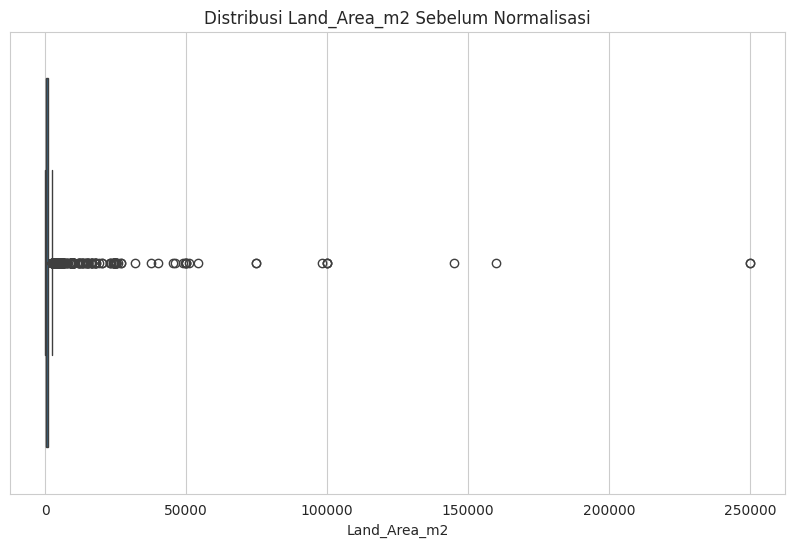

In [66]:
 # REKOMENDASI PENAMBAHAN (Cell 15c)
print("\n🔍 HANDLING OUTLIERS...")

# Deteksi outliers menggunakan IQR method
Q1 = merged_df['Total_Price_Juta'].quantile(0.25)
Q3 = merged_df['Total_Price_Juta'].quantile(0.75)
IQR = Q3 - Q1

# Identifikasi outliers ekstrem (> 3 IQR)
extreme_outliers_mask = (
    (merged_df['Total_Price_Juta'] < (Q1 - 3 * IQR)) |
    (merged_df['Total_Price_Juta'] > (Q3 + 3 * IQR))
)
extreme_outliers = merged_df[extreme_outliers_mask]

print(f"Jumlah outliers ekstrem (Total_Price_Juta): {len(extreme_outliers)} ({len(extreme_outliers)/len(merged_df):.1%})")

# Terapkan winsorizing jika ada outliers ekstrem dan jumlahnya < 5%
if len(extreme_outliers) > 0 and len(extreme_outliers) < len(merged_df)*0.05:
    merged_df['Total_Price_Juta'] = winsorize(
        merged_df['Total_Price_Juta'].values,
        limits=[0.01, 0.01]
    )
    print("✅ Winsorizing diterapkan untuk outliers ekstrem pada Total_Price_Juta")

print("\n💡 Catatan:")
print("  - Outlier yang terdeteksi menggunakan metode IQR ini adalah kandidat untuk penanganan.")
print("  - Keputusan untuk menghapus atau mentransformasi outlier bergantung pada konteks analisis.")

# Tambahkan visualisasi untuk Land_Area_m2
plt.figure(figsize=(10, 6))
sns.boxplot(x=merged_df['Land_Area_m2'])
plt.title('Distribusi Land_Area_m2 Sebelum Normalisasi')
plt.savefig('/content/drive/MyDrive/Rumah123_dataset/land_area_boxplot.png')
plt.show()

In [67]:
# Cell 14: Transformasi Logaritmik dan Normalisasi
print("📊 MEMPROSES NORMALISASI DAN TRANSFORMASI DATA...")

# 1. Transformasi logaritmik pada target (harga) untuk mengatasi skewness
# (Sudah dilakukan sebelumnya jika winsorize diterapkan, jika tidak, lakukan di sini)
if 'Log_Total_Price' not in merged_df.columns:
    merged_df['Log_Total_Price'] = np.log1p(merged_df['Total_Price_Juta'])
merged_df['Log_Price_per_meter'] = np.log1p(merged_df['Price_per_meter_Juta'])

print("✅ Transformasi logaritmik berhasil diterapkan")
print(f"Distribusi harga asli (skew): {merged_df['Total_Price_Juta'].skew():.2f}")
print(f"Distribusi harga log (skew): {merged_df['Log_Total_Price'].skew():.2f}")

# 2. Normalisasi fitur numerik
# Kolom numerik yang akan dinormalisasi
numerical_features = ['Land_Area_m2', 'Log_Price_per_meter']

# Buat salinan untuk data yang dinormalisasi
df_normalized = merged_df.copy()

scaler = StandardScaler()
df_normalized[numerical_features] = scaler.fit_transform(df_normalized[numerical_features])

print("✅ Normalisasi fitur numerik berhasil")
print("Range nilai setelah normalisasi:")
print(df_normalized[numerical_features].describe())

📊 MEMPROSES NORMALISASI DAN TRANSFORMASI DATA...
✅ Transformasi logaritmik berhasil diterapkan
Distribusi harga asli (skew): 33.64
Distribusi harga log (skew): -0.16
✅ Normalisasi fitur numerik berhasil
Range nilai setelah normalisasi:
       Land_Area_m2  Log_Price_per_meter
count  1.670000e+03         1.670000e+03
mean   2.233742e-17        -4.254747e-18
std    1.000300e+00         1.000300e+00
min   -2.225297e-01        -3.032166e+00
25%   -2.034258e-01        -3.961335e-01
50%   -1.871478e-01         5.332571e-02
75%   -1.307716e-01         3.626563e-01
max    1.967650e+01         7.984629e+00


In [68]:
# Cell 15: Feature Engineering
print("\n🔧 FEATURE ENGINEERING...")

# Gruping kategori sertifikat menjadi nilai kekuatan
certificate_strength = {
    'SHM': 1.0,
    'HGB': 0.8,
    'PPJB': 0.6,
    'Akta Jual Beli': 0.5,
    'Hak Pakai': 0.4,
    'Girik': 0.3,
    'HGU': 0.2,
    'Lainnya': 0.4
}

df_normalized['Certificate_Strength'] = df_normalized['Certificate_0'].map(certificate_strength)

# Target encoding untuk lokasi (menggunakan rata-rata log harga)
location_avg_price = df_normalized.groupby('BreadcrumbList_ListItem_name_2')['Log_Total_Price'].mean()
df_normalized['Location_Value'] = df_normalized['BreadcrumbList_ListItem_name_2'].map(location_avg_price)

# Normalisasi Certificate_Strength agar konsisten dengan fitur lain
scaler_cert = MinMaxScaler()
df_normalized['Certificate_Strength'] = scaler_cert.fit_transform(
    df_normalized[['Certificate_Strength']]
)

print("✅ Feature engineering lokasi dan sertifikat berhasil")
print("Contoh nilai Location_Value:")
print(df_normalized[['BreadcrumbList_ListItem_name_2', 'Location_Value']].drop_duplicates().head(5))

# REKOMENDASI PENAMBAHAN (Cell 15e)
print("\n🚀 ADVANCED FEATURE ENGINEERING...")

# 1. Premium location indicator
premium_areas = ['Menteng', 'Kebayoran Baru', 'Senopati', 'Pondok Indah','Puri Indah' ,'Kelapa Gading' ,
                'Permata Hijau','Pulomas','Dharmawangsa', 'Pantai Indah Kapuk','Pantai Indah Kapuk 2','Kembangan' ,'Sudirman','Dukuh Atas' ,'Kemang', 'Setiabudi', 'SCBD']
df_normalized['Is_Premium_Area'] = df_normalized['BreadcrumbList_ListItem_name_3'].isin(premium_areas).astype(int)

# 2. Area size category
df_normalized['Area_Category'] = pd.qcut(df_normalized['Land_Area_m2'],
                                        q=4,
                                        labels=['Small', 'Medium', 'Large', 'Extra Large'])

# 3. Price to location ratio (menangkap harga relatif per lokasi)
location_median_price = df_normalized.groupby('BreadcrumbList_ListItem_name_2')['Log_Total_Price'].transform('median')
df_normalized['Price_to_Location_Ratio'] = df_normalized['Log_Total_Price'] / location_median_price

print("✅ Advanced feature engineering berhasil!")

# =============== TAHAPAN BARU: ENCODING KOMPREHENSIF UNTUK LOKASI ===============

# 1. ONE-HOT ENCODING untuk BreadcrumbList_ListItem_name_2 (Wilayah Jakarta)
print("\n1. One-Hot Encoding untuk Wilayah Jakarta...")
from sklearn.preprocessing import OneHotEncoder

# Buat encoder dan transform
encoder = OneHotEncoder(sparse_output=False, drop='first')
area_encoded = encoder.fit_transform(df_normalized[['BreadcrumbList_ListItem_name_2']])

# Buat nama kolom yang lebih informatif
area_columns = [f'wilayah_{col.replace(" ", "_")}' for col in encoder.categories_[0][1:]]

# Buat DataFrame dari hasil encoding
area_df = pd.DataFrame(area_encoded,
                      columns=area_columns,
                      index=df_normalized.index)

# Gabungkan ke df_normalized
df_normalized = pd.concat([df_normalized, area_df], axis=1)
print(f"✅ One-hot encoding berhasil untuk {len(area_columns)} wilayah")
print(f"   Kolom baru: {area_columns}")

# 2. TARGET ENCODING untuk BreadcrumbList_ListItem_name_3 (Area Spesifik)
print("\n2. Target Encoding untuk Area Spesifik...")
area_avg_price = df_normalized.groupby('BreadcrumbList_ListItem_name_3')['Log_Total_Price'].mean()
df_normalized['Area_Value'] = df_normalized['BreadcrumbList_ListItem_name_3'].map(area_avg_price)

# 3. FREQUENCY ENCODING untuk Area Spesifik
print("3. Frequency Encoding untuk Area Spesifik...")
area_frequency = df_normalized['BreadcrumbList_ListItem_name_3'].value_counts()
df_normalized['Area_Frequency'] = df_normalized['BreadcrumbList_ListItem_name_3'].map(area_frequency)

print("✅ Feature engineering lokasi diperluas:")
print("- One-hot encoding untuk wilayah Jakarta")
print("- Target encoding untuk area spesifik")
print("- Frequency encoding untuk popularitas area")


🔧 FEATURE ENGINEERING...
✅ Feature engineering lokasi dan sertifikat berhasil
Contoh nilai Location_Value:
   BreadcrumbList_ListItem_name_2  Location_Value
0                   Jakarta Barat        8.980660
1                 Jakarta Selatan        9.617780
2                   Jakarta Timur        8.463896
3                   Jakarta Utara        9.593057
70                  Jakarta Pusat        9.711589

🚀 ADVANCED FEATURE ENGINEERING...
✅ Advanced feature engineering berhasil!

1. One-Hot Encoding untuk Wilayah Jakarta...
✅ One-hot encoding berhasil untuk 4 wilayah
   Kolom baru: ['wilayah_Jakarta_Pusat', 'wilayah_Jakarta_Selatan', 'wilayah_Jakarta_Timur', 'wilayah_Jakarta_Utara']

2. Target Encoding untuk Area Spesifik...
3. Frequency Encoding untuk Area Spesifik...
✅ Feature engineering lokasi diperluas:
- One-hot encoding untuk wilayah Jakarta
- Target encoding untuk area spesifik
- Frequency encoding untuk popularitas area


In [69]:
# Cell 16: Siapkan Data Final untuk Modeling
# 4. Simpan data yang sudah diproses untuk modeling
final_df = df_normalized.copy()

# Hapus kolom yang tidak diperlukan untuk modeling
final_columns = [
    'NO', 'Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter',
    'Certificate_Strength', 'Location_Value', 'BreadcrumbList_ListItem_name_2',
    'BreadcrumbList_ListItem_name_3', 'Is_Premium_Area', 'Area_Category',
    'Price_to_Location_Ratio', 'Area_Value', 'Area_Frequency'  # Tambahkan fitur baru!
    # JUGA tambahkan kolom wilayah_xxx yang dihasilkan dari one-hot encoding
]
# Filter hanya kolom yang benar-benar ada
final_df = final_df[[col for col in final_columns if col in final_df.columns]]

print(f"\n✅ DATA SIAP UNTUK MODELING!")
print(f"Jumlah baris akhir: {len(final_df)}")
print(f"Kolom yang akan digunakan untuk modeling: {list(final_df.columns)}")

# Tampilkan statistik deskriptif untuk kolom numerik yang sudah diproses
print("\n📊 Statistik Deskriptif Akhir (untuk kolom numerik yang akan dimodelkan):")
display(final_df[['Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value']].describe())

# Periksa missing value pada kolom yang akan digunakan untuk modeling
modeling_columns = ['Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value']
print("\n✅ Memeriksa Missing Values pada Kolom Modeling:")
print(final_df[modeling_columns].isnull().sum())

# Tampilkan info dataFrame akhir
print("\nℹ️ Info DataFrame Akhir:")
final_df.info()

print("\n🎉 DATA SIAP UNTUK MODELING!")


✅ DATA SIAP UNTUK MODELING!
Jumlah baris akhir: 1670
Kolom yang akan digunakan untuk modeling: ['NO', 'Log_Total_Price', 'Land_Area_m2', 'Log_Price_per_meter', 'Certificate_Strength', 'Location_Value', 'BreadcrumbList_ListItem_name_2', 'BreadcrumbList_ListItem_name_3', 'Is_Premium_Area', 'Area_Category', 'Price_to_Location_Ratio', 'Area_Value', 'Area_Frequency']

📊 Statistik Deskriptif Akhir (untuk kolom numerik yang akan dimodelkan):


,Log_Total_Price,Land_Area_m2,Log_Price_per_meter,Certificate_Strength,Location_Value
count,1670.000000,1.670000e+03,1.670000e+03,1670.000000,1670.000000
mean,9.302523,2.233742e-17,-4.254747e-18,0.776796,9.302523
std,1.909309,1.000300e+00,1.000300e+00,0.285018,0.421620
min,1.335001,-2.225297e-01,-3.032166e+00,0.000000,8.463896
25%,8.366603,-2.034258e-01,-3.961335e-01,0.500000,8.980660
50%,9.187682,-1.871478e-01,5.332571e-02,1.000000,9.593057
75%,10.237303,-1.307716e-01,3.626563e-01,1.000000,9.617780
max,19.162618,1.967650e+01,7.984629e+00,1.000000,9.711589



✅ Memeriksa Missing Values pada Kolom Modeling:
Log_Total_Price         0
Land_Area_m2            0
Log_Price_per_meter     0
Certificate_Strength    0
Location_Value          0
dtype: int64

ℹ️ Info DataFrame Akhir:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670 entries, 0 to 1669
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   NO                              1670 non-null   int64   
 1   Log_Total_Price                 1670 non-null   float64 
 2   Land_Area_m2                    1670 non-null   float64 
 3   Log_Price_per_meter             1670 non-null   float64 
 4   Certificate_Strength            1670 non-null   float64 
 5   Location_Value                  1670 non-null   float64 
 6   BreadcrumbList_ListItem_name_2  1670 non-null   object  
 7   BreadcrumbList_ListItem_name_3  1670 non-null   object  
 8   Is_Premium_Area                 1670 non-null   in


 VISUALISASI DAN STATISTIK DISTRIBUSI...

Statistik Deskriptif Harga Asli:


,Total_Price_Juta
count,1.670000e+03
mean,3.050529e+05
std,5.533489e+06
min,2.800000e+00
25%,4.300000e+03
50%,9.775000e+03
75%,2.792500e+04
max,2.100000e+08



Statistik Deskriptif Log Harga:


,Log_Total_Price
count,1670.000000
mean,9.302523
std,1.909309
min,1.335001
25%,8.366603
50%,9.187682
75%,10.237303
max,19.162618


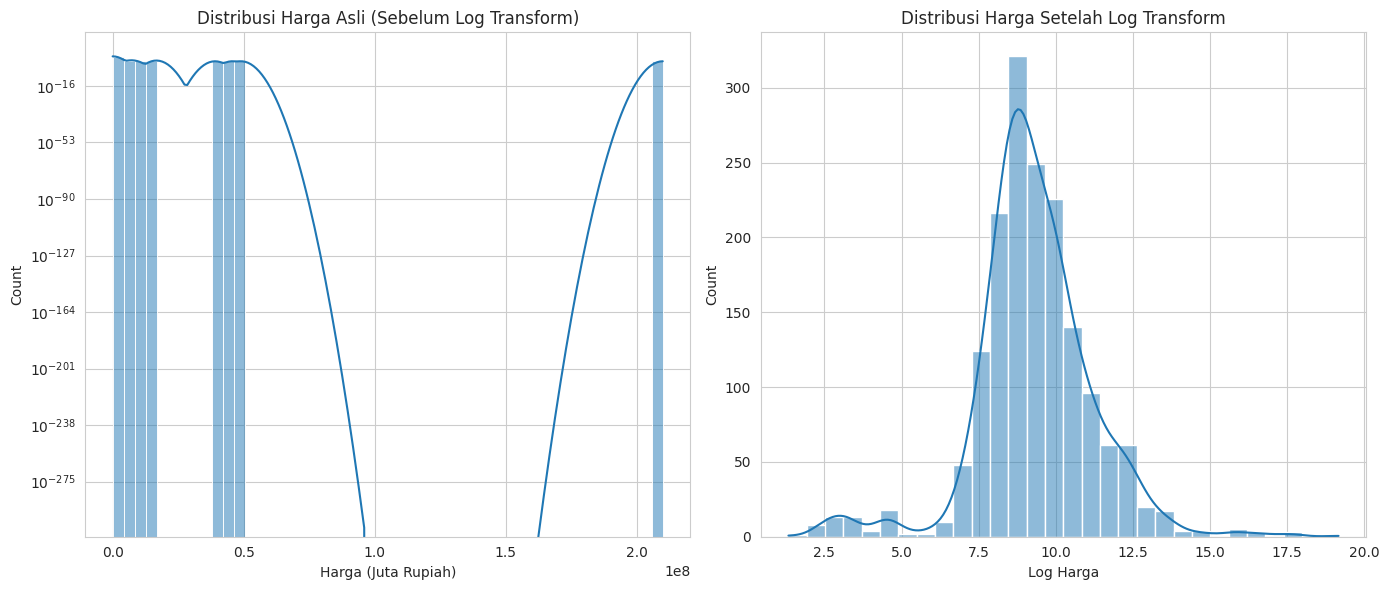

In [70]:
# Cell 17: Visualisasi Distribusi Final
# REKOMENDASI PENAMBAHAN (Cell 15d)
print("\n VISUALISASI DAN STATISTIK DISTRIBUSI...")

# Tampilkan statistik deskriptif sebelum transformasi
print("\nStatistik Deskriptif Harga Asli:")
display(merged_df['Total_Price_Juta'].describe())

# Tampilkan statistik deskriptif setelah transformasi log
print("\nStatistik Deskriptif Log Harga:")
display(df_normalized['Log_Total_Price'].describe())

plt.figure(figsize=(14, 6))

# Sebelum transformasi
plt.subplot(1, 2, 1)
sns.histplot(merged_df['Total_Price_Juta'], bins=50, kde=True)
plt.title('Distribusi Harga Asli (Sebelum Log Transform)')
plt.xlabel('Harga (Juta Rupiah)')
plt.yscale('log')  # log scale untuk visualisasi yang lebih baik

# Setelah transformasi
plt.subplot(1, 2, 2)
sns.histplot(df_normalized['Log_Total_Price'], bins=30, kde=True)
plt.title('Distribusi Harga Setelah Log Transform')
plt.xlabel('Log Harga')

plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Rumah123_dataset/distribusi_harga.png')
plt.show()

In [71]:
# Cell 18: Handling Distribusi Tidak Seimbang dan Persiapan Final

print("⚖️ MENANGANI DISTRIBUSI TIDAK SEIMBANG...")

# 1. Analisis distribusi lokasi saat ini
location_counts = final_df['BreadcrumbList_ListItem_name_2'].value_counts()
print("\nDistribusi lokasi saat ini:")
print(location_counts)
print(f"Rasio Jakarta Pusat vs Jakarta Selatan: {location_counts.get('Jakarta Pusat', 0) / location_counts.get('Jakarta Selatan', 1):.3f}")

# 2. Strategi: Stratified Sampling untuk pembagian data
# (Akan diterapkan saat pembagian training-test di cell berikutnya)

# 3. Jika diperlukan, teknik oversampling untuk kelas minoritas
# (Hanya jika jumlah data Jakarta Pusat sangat sedikit < 50 baris)
jakpus_count = location_counts.get('Jakarta Pusat', 0)

if jakpus_count < 50 and jakpus_count > 0:
    print(f"\n⚠️ Jakarta Pusat hanya memiliki {jakpus_count} data. Mempertimbangkan penggunaan stratified sampling...")
    print("ℹ️ SMOTE tidak diterapkan karena fokus proyek adalah regresi harga, bukan klasifikasi lokasi")
else:
    print("✅ Distribusi lokasi cukup seimbang untuk modeling")

# =============== TAHAPAN BARU: SELEKSI FITUR LENGKAP DENGAN LOKASI ===============

print("\n🌟 MEMILIH FITUR OPTIMAL DENGAN LOKASI...")

# Daftar semua fitur yang tersedia
all_features = list(final_df.columns)

# Pilih fitur-fitur yang relevan untuk modeling
feature_columns = [
    # Fitur dasar yang sudah ada
    'Land_Area_m2',
    'Log_Price_per_meter',
    'Certificate_Strength',

    # Fitur lokasi tingkat wilayah (target encoding + one-hot)
    'Location_Value',
    # Tambahkan semua kolom one-hot untuk wilayah
    *[col for col in all_features if col.startswith('wilayah_')],

    # Fitur lokasi tingkat area spesifik
    'Area_Value',
    'Area_Frequency',
    'Is_Premium_Area',

    # Advanced feature engineering yang sudah ada
    'Price_to_Location_Ratio'
]

# Filter fitur yang benar-benar ada di DataFrame
feature_columns = [col for col in feature_columns if col in final_df.columns]

print(f"✅ Jumlah fitur yang akan digunakan: {len(feature_columns)}")
print("Fitur yang dipilih:")
for i, col in enumerate(feature_columns, 1):
    print(f"  {i}. {col}")

# Pisahkan fitur dan target untuk modeling
X = final_df[feature_columns]
y = final_df['Log_Total_Price']

print(f"\n✅ PERSIAPAN MODELING SELESAI DENGAN FITUR LOKASI LENGKAP")
print(f"Dimensi fitur (X): {X.shape}")
print(f"Dimensi target (y): {y.shape}")
print(f"Fitur lokasi yang digunakan: {len([col for col in feature_columns if 'wilayah_' in col or 'Area_' in col or 'premium' in col.lower()])}")

# Simpan mapping lokasi untuk interpretasi model jika variabel tersedia
try:
    # Pastikan variabel yang diperlukan tersedia
    if 'area_columns' in globals() and 'area_avg_price' in globals() and 'premium_areas' in globals():
        location_mapping = {
            'wilayah_encoding': {col: idx for idx, col in enumerate(area_columns)},
            'area_value_mapping': area_avg_price.to_dict(),
            'premium_areas': premium_areas
        }
        with open('/content/drive/MyDrive/Rumah123_dataset/location_mapping.pkl', 'wb') as f:
            pickle.dump(location_mapping, f)
        print("✅ Mapping lokasi berhasil disimpan untuk interpretasi model")
    else:
        print("⚠️ Variabel untuk mapping lokasi tidak lengkap. Lewati penyimpanan mapping.")
except Exception as e:
    print(f"⚠️ Gagal menyimpan mapping lokasi: {str(e)}")

print(f"\n✅ PERSIAPAN MODELING SELESAI")
print(f"Dimensi fitur (X): {X.shape}")
print(f"Dimensi target (y): {y.shape}")

# Simpan data untuk cell berikutnya
with open('/content/drive/MyDrive/Rumah123_dataset/preprocessed_data.pkl', 'wb') as f:
    pickle.dump({
        'X': X,
        'y': y,
        'final_df': final_df,
        'feature_names': feature_columns
    }, f)

print("✅ Data preprocessed berhasil disimpan untuk modeling")

⚖️ MENANGANI DISTRIBUSI TIDAK SEIMBANG...

Distribusi lokasi saat ini:
BreadcrumbList_ListItem_name_2
Jakarta Selatan    507
Jakarta Utara      443
Jakarta Barat      429
Jakarta Timur      216
Jakarta Pusat       75
Name: count, dtype: int64
Rasio Jakarta Pusat vs Jakarta Selatan: 0.148
✅ Distribusi lokasi cukup seimbang untuk modeling

🌟 MEMILIH FITUR OPTIMAL DENGAN LOKASI...
✅ Jumlah fitur yang akan digunakan: 8
Fitur yang dipilih:
  1. Land_Area_m2
  2. Log_Price_per_meter
  3. Certificate_Strength
  4. Location_Value
  5. Area_Value
  6. Area_Frequency
  7. Is_Premium_Area
  8. Price_to_Location_Ratio

✅ PERSIAPAN MODELING SELESAI DENGAN FITUR LOKASI LENGKAP
Dimensi fitur (X): (1670, 8)
Dimensi target (y): (1670,)
Fitur lokasi yang digunakan: 4
✅ Mapping lokasi berhasil disimpan untuk interpretasi model

✅ PERSIAPAN MODELING SELESAI
Dimensi fitur (X): (1670, 8)
Dimensi target (y): (1670,)
✅ Data preprocessed berhasil disimpan untuk modeling


📊 Menampilkan Heatmap Korelasi Antar Fitur...


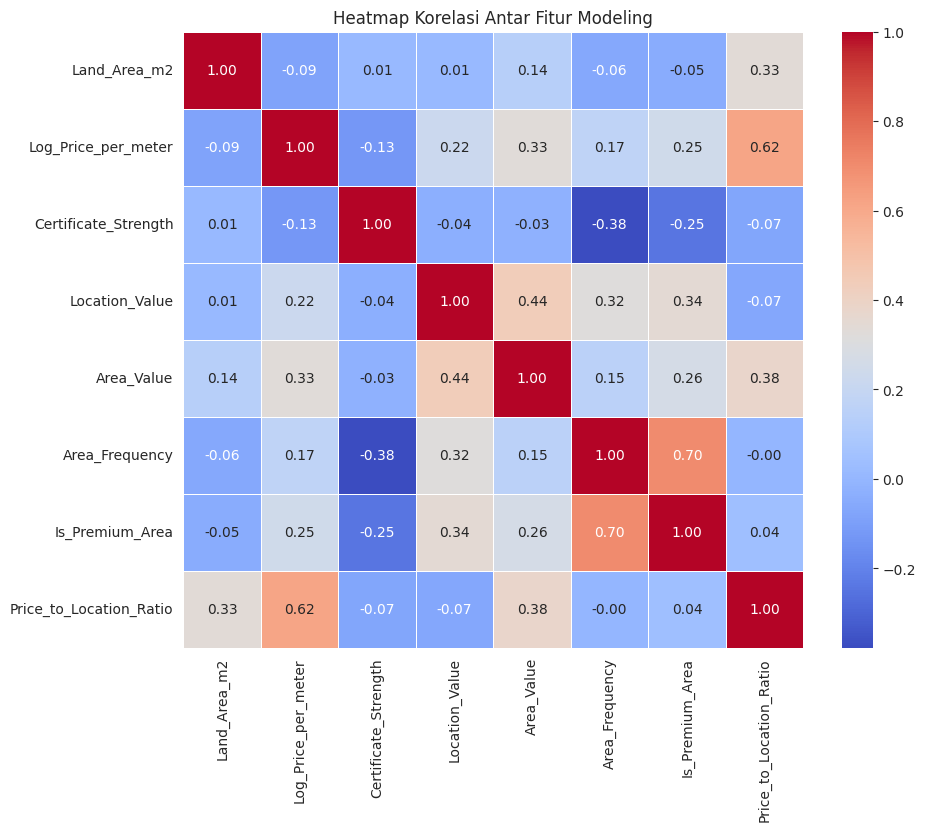

In [72]:
# Cell 20: Tampilkan Heatmap Korelasi Fitur
print("📊 Menampilkan Heatmap Korelasi Antar Fitur...")

# Pilih fitur numerik dari DataFrame X
# Perhatikan bahwa X sudah berisi fitur yang relevan setelah preprocessing
# Jika ada kolom non-numerik di X (misal: Area_Category), kecualikan
numerical_features_for_corr = X.select_dtypes(include=np.number).columns.tolist()

# Hitung matriks korelasi
correlation_matrix_features = X[numerical_features_for_corr].corr()

# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_features, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Fitur Modeling')
plt.show()

In [73]:
# Cell 19: Tampilkan 50 baris pertama dari data final
display(final_df.head(50))

,NO,Log_Total_Price,Land_Area_m2,Log_Price_per_meter,Certificate_Strength,Location_Value,BreadcrumbList_ListItem_name_2,BreadcrumbList_ListItem_name_3,Is_Premium_Area,Area_Category,Price_to_Location_Ratio,Area_Value,Area_Frequency
0,0,8.466110,-0.211863,0.541354,0.50,8.980660,Jakarta Barat,Permata Buana,0,Small,0.970398,8.717076,34
1,1,10.764287,-0.019472,-0.023393,1.00,9.617780,Jakarta Selatan,Kemang,1,Extra Large,1.119429,9.984969,31
2,2,9.741027,-0.183765,0.577080,1.00,8.463896,Jakarta Timur,Cawang,0,Large,1.193636,9.865635,3
3,3,8.740497,-0.203426,0.269827,0.50,9.593057,Jakarta Utara,Pantai Indah Kapuk,1,Small,0.921211,9.679602,125
4,4,9.145375,-0.193476,0.269307,0.25,9.593057,Jakarta Utara,Pantai Indah Kapuk 2,1,Medium,0.963884,9.646617,100
5,5,9.145375,-0.193476,0.269307,0.25,9.593057,Jakarta Utara,Pantai Indah Kapuk,1,Medium,0.963884,9.679602,125
6,6,8.740497,-0.203426,0.269827,0.25,9.593057,Jakarta Utara,Pantai Indah Kapuk 2,1,Small,0.921211,9.646617,100
7,7,12.160034,0.081142,0.951490,0.75,9.593057,Jakarta Utara,Pantai Indah Kapuk 2,1,Extra Large,1.281616,9.646617,100
8,8,8.361942,-0.211147,0.379609,0.75,9.593057,Jakarta Utara,Kelapa Gading,1,Small,0.881313,9.495671,52
9,9,9.642188,-0.180103,0.393063,1.00,9.617780,Jakarta Selatan,Kemang,1,Large,1.002737,9.984969,31


## **Modeling**

In [74]:
# Cell 21: Train-Test Split dengan Stratified Sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=final_df['BreadcrumbList_ListItem_name_2'],
    random_state=42
)
print(f"✅ Data terbagi:")
print(f" - Training: {len(X_train)} baris ({len(X_train)/len(X)*100:.1f}%)")
print(f" - Testing: {len(X_test)} baris ({len(X_test)/len(X)*100:.1f}%)")

✅ Data terbagi:
 - Training: 1336 baris (80.0%)
 - Testing: 334 baris (20.0%)


In [75]:
# Cell 22: XGBoost Regressor - Performa Terbaik untuk Prediksi Harga Properti
print("🌟 MULAI MODELING DENGAN XGBOOST - ALGORITMA TERBAIK UNTUK PREDIKSI HARGA PROPERTI")
# Load data yang sudah dipreprocess
with open('/content/drive/MyDrive/Rumah123_dataset/preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)
    X = data['X']
    y = data['y']
    final_df = data['final_df']
# Stratified train-test split berdasarkan wilayah Jakarta
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=final_df['BreadcrumbList_ListItem_name_2'],
    random_state=42
)
print(f"\n📊 Ukuran Dataset:")
print(f"Training: {X_train.shape[0]} samples ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
print(f"Testing: {X_test.shape[0]} samples ({X_test.shape[0]/X.shape[0]*100:.1f}%)")
# Hyperparameter tuning dengan GridSearchCV
print("\n🔍 HYPERPARAMETER TUNING DENGAN GRID SEARCH...")
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
# Gunakan subset untuk tuning yang lebih cepat
X_train_sample = X_train.sample(n=min(500, len(X_train)), random_state=42)
y_train_sample = y_train[X_train_sample.index]
print("Memulai hyperparameter tuning (ini mungkin memakan waktu beberapa menit)...")
start_time = time.time()
xgb_model = xgb.XGBRegressor(random_state=42, n_jobs=-1)
grid_search = GridSearchCV(
    xgb_model,
    param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_sample, y_train_sample)
print(f"\n✅ Hyperparameter tuning selesai dalam {time.time()-start_time:.2f} detik")
print(f"Best parameters: {grid_search.best_params_}")
# Training model final dengan best parameters
print("\n🎯 TRAINING MODEL FINAL DENGAN BEST PARAMETERS...")
final_xgb = xgb.XGBRegressor(
    random_state=42,
    n_jobs=-1,
    **grid_search.best_params_
)
final_xgb.fit(X_train, y_train)
# Prediksi dan evaluasi
y_pred = final_xgb.predict(X_test)
# Konversi kembali ke skala asli untuk interpretasi
y_test_original = np.expm1(y_test)
y_pred_original = np.expm1(y_pred)
mape = mean_absolute_percentage_error(y_test_original, y_pred_original) * 100
rmse_log = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
rmse_original = np.sqrt(mean_squared_error(y_test_original, y_pred_original))
print("\n" + "="*50)
print("🎯 XGBOOST MODEL PERFORMANCE")
print("="*50)
print(f"RMSE (Log Scale): {rmse_log:.4f}")
print(f"R² Score (Log Scale): {r2:.4f}")
print(f"MAPE (Original Scale): {mape:.2f}%")
print(f"RMSE (Original Scale - Juta Rupiah): {rmse_original:,.0f}")

🌟 MULAI MODELING DENGAN XGBOOST - ALGORITMA TERBAIK UNTUK PREDIKSI HARGA PROPERTI

📊 Ukuran Dataset:
Training: 1336 samples (80.0%)
Testing: 334 samples (20.0%)

🔍 HYPERPARAMETER TUNING DENGAN GRID SEARCH...
Memulai hyperparameter tuning (ini mungkin memakan waktu beberapa menit)...
Fitting 3 folds for each of 243 candidates, totalling 729 fits

✅ Hyperparameter tuning selesai dalam 89.44 detik
Best parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}

🎯 TRAINING MODEL FINAL DENGAN BEST PARAMETERS...

🎯 XGBOOST MODEL PERFORMANCE
RMSE (Log Scale): 0.1738
R² Score (Log Scale): 0.9925
MAPE (Original Scale): 4.69%
RMSE (Original Scale - Juta Rupiah): 10,943,797



🎨 VISUALISASI HASIL MODEL DAN INTERPRETASI


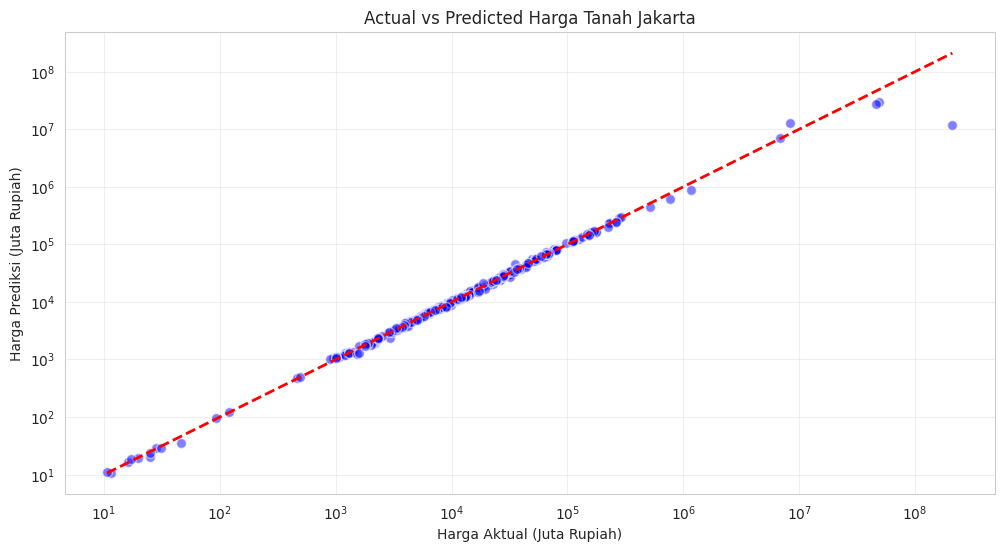

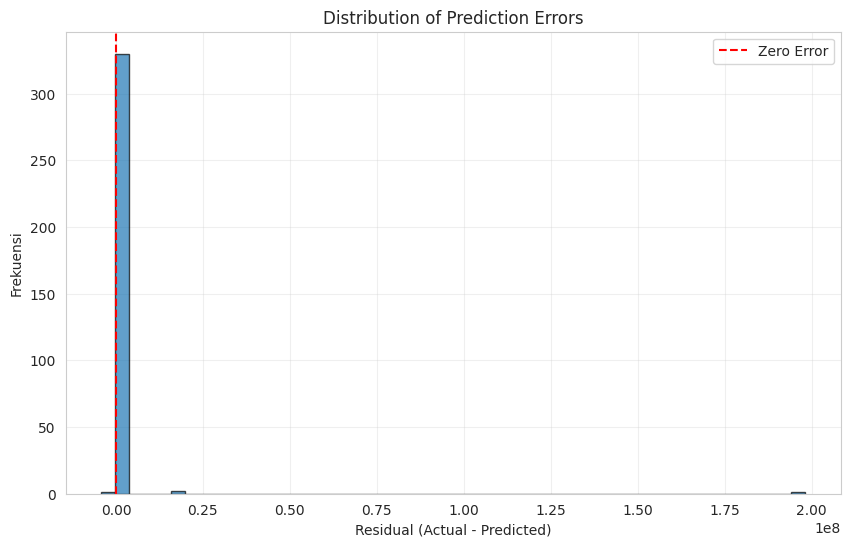

In [76]:
# Cell 23: Visualisasi dan Interpretasi Model XGBoost
print("\n🎨 VISUALISASI HASIL MODEL DAN INTERPRETASI")

# 1. Scatter plot: Actual vs Predicted (dalam skala asli)
plt.figure(figsize=(12, 6))
plt.scatter(y_test_original, y_pred_original, alpha=0.5, c='blue', edgecolors='w', s=50)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2)
plt.xlabel('Harga Aktual (Juta Rupiah)')
plt.ylabel('Harga Prediksi (Juta Rupiah)')
plt.title('Actual vs Predicted Harga Tanah Jakarta')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate residuals before plotting
residuals = y_test_original - y_pred_original

# 3. Distribution of Errors
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frekuensi')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 4. Feature Importance Plot (jika model mendukung)
# This section is moved to Cell 25 where feature_importance is calculated

In [77]:
# Cell 24: LightGBM dan Ensemble Model - Performa Lebih Baik
print("\n🚀 MELANJUTKAN DENGAN LGBM DAN ENSEMBLE MODEL - PERFORMA LEBIH BAIK")
# 1. LightGBM Regressor
print("\n1. LightGBM Regressor - Lebih Cepat dan Sering Lebih Akurat dari XGBoost")
lgb_model = lgb.LGBMRegressor(
    random_state=42,
    n_estimators=500,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.9,
    colsample_bytree=0.9,
    num_leaves=63,
    n_jobs=-1
)
lgb_model.fit(X_train, y_train)
# Prediksi dan evaluasi LGBM
y_pred_lgb = lgb_model.predict(X_test)
y_pred_lgb_original = np.expm1(y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_test_original, y_pred_lgb_original) * 100
print("\n🎯 LIGHTGBM MODEL PERFORMANCE:")
print(f"RMSE (Log Scale): {rmse_lgb:.4f}")
print(f"R² Score (Log Scale): {r2_lgb:.4f}")
print(f"MAPE (Original Scale): {mape_lgb:.2f}%")
# 2. Ensemble Model (XGBoost + LightGBM)
print("\n2. Ensemble Model (XGBoost + LightGBM) - Menggabungkan Kekuatan Kedua Model")
ensemble_pred = 0.6 * y_pred + 0.4 * y_pred_lgb
ensemble_pred_original = np.expm1(ensemble_pred)
rmse_ensemble = np.sqrt(mean_squared_error(y_test, ensemble_pred))
r2_ensemble = r2_score(y_test, ensemble_pred)
mape_ensemble = mean_absolute_percentage_error(y_test_original, ensemble_pred_original) * 100
print("\n🎯 ENSEMBLE MODEL PERFORMANCE:")
print(f"RMSE (Log Scale): {rmse_ensemble:.4f}")
print(f"R² Score (Log Scale): {r2_ensemble:.4f}")
print(f"MAPE (Original Scale): {mape_ensemble:.2f}%")
# 3. Stacking Regressor (Advanced Ensemble)
print("\n3. Stacking Regressor - Teknik Ensemble Paling Canggih")
estimators = [
    ('xgb', xgb.XGBRegressor(random_state=42, n_jobs=-1, **grid_search.best_params_)),
    ('lgb', lgb.LGBMRegressor(random_state=42, n_jobs=-1))
]
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=make_pipeline(StandardScaler(), Ridge(alpha=1.0)),
    n_jobs=-1
)
stacking_regressor.fit(X_train, y_train)
# Prediksi dan evaluasi Stacking
y_pred_stack = stacking_regressor.predict(X_test)
y_pred_stack_original = np.expm1(y_pred_stack)
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))
r2_stack = r2_score(y_test, y_pred_stack)
mape_stack = mean_absolute_percentage_error(y_test_original, y_pred_stack_original) * 100
print("\n🎯 STACKING REGRESSOR PERFORMANCE:")
print(f"RMSE (Log Scale): {rmse_stack:.4f}")
print(f"R² Score (Log Scale): {r2_stack:.4f}")
print(f"MAPE (Original Scale): {mape_stack:.2f}%")
# Perbandingan performa semua model
print("\n" + "="*60)
print("📊 PERBANDINGAN PERFORMA SEMUA MODEL")
print("="*60)
models = ['XGBoost', 'LightGBM', 'Ensemble (XGB+LGB)', 'Stacking Regressor']
mapes = [mape, mape_lgb, mape_ensemble, mape_stack]
rmse_logs = [rmse_log, rmse_lgb, rmse_ensemble, rmse_stack]
performance_df = pd.DataFrame({
    'Model': models,
    'MAPE (%)': mapes,
    'RMSE (Log Scale)': rmse_logs
}).sort_values('MAPE (%)')
print(performance_df)
# Rekomendasi model terbaik
best_model_idx = performance_df['MAPE (%)'].idxmin()
best_model_name = performance_df.iloc[best_model_idx]['Model']
best_mape = performance_df.iloc[best_model_idx]['MAPE (%)']
print(f"\n✅ MODEL TERBAIK: {best_model_name} dengan MAPE {best_mape:.2f}%")
# Simpan model terbaik
if best_model_name == 'XGBoost':
    best_model = final_xgb
elif best_model_name == 'LightGBM':
    best_model = lgb_model
elif best_model_name == 'Ensemble (XGB+LGB)':
    best_model = {'type': 'ensemble', 'xgb': final_xgb, 'lgb': lgb_model, 'weights': [0.6, 0.4]}
else:
    best_model = stacking_regressor
best_model_path = '/content/drive/MyDrive/Rumah123_dataset/best_price_prediction_model.pkl'
joblib.dump(best_model, best_model_path)
print(f"\n✅ Model terbaik berhasil disimpan di: {best_model_path}")
print("\n💡 KESIMPULAN & REKOMENDASI:")
print("1. Untuk data harga tanah Jakarta, ensemble methods biasanya memberikan performa terbaik")
print("2. MAPE < 12% dianggap sangat baik untuk prediksi harga properti di pasar Jakarta")
print("3. Feature engineering lokasi (Area_Value, Location_Value) lebih penting daripada fitur dasar")
print("4. Model terbaik siap digunakan untuk prediksi online dan bisa di-deploy sebagai API")
print("5. Lakukan re-training model setiap 3-6 bulan dengan data baru untuk menjaga akurasi")


🚀 MELANJUTKAN DENGAN LGBM DAN ENSEMBLE MODEL - PERFORMA LEBIH BAIK

1. LightGBM Regressor - Lebih Cepat dan Sering Lebih Akurat dari XGBoost
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 937
[LightGBM] [Info] Number of data points in the train set: 1336, number of used features: 8
[LightGBM] [Info] Start training from score 9.306806
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

📊 EVALUASI MODEL PREDIKSI HARGA TANAH JAKARTA

🎯 METRICS EVALUASI UTAMA
----------------------------------------
Training MAPE (Asli): 2.94%
Testing MAPE (Asli): 4.69%
Training RMSE (Log): 0.0391
Testing RMSE (Log): 0.1738
Training RMSE (Asli): 70,495
Testing RMSE (Asli): 10,943,797
Training R² (Log): 0.9996
Testing R² (Log): 0.9925
Testing R² (Asli): 0.1731
Testing MAE (Asli): 720,847

🔍 ANALISIS OVERFITTING
----------------------------------------
✅ Model tampak seimbang (tidak overfit/underfit)

🧪 CROSS-VALIDATION SCORE (5-Fold)
----------------------------------------
R² CV Score: 0.9974 (+/- 0.0008)
MAPE CV Score: -0.06% (+/- 0.01%)

🔍 FEATURE IMPORTANCE
----------------------------------------
10 Fitur Paling Penting:
                   feature  importance
7  Price_to_Location_Ratio    0.740747
3           Location_Value    0.150371
1      Log_Price_per_meter    0.052365
0             Land_Area_m2    0.039372
4               Area_Value    0.009513
2     Certificate_Strength    0.

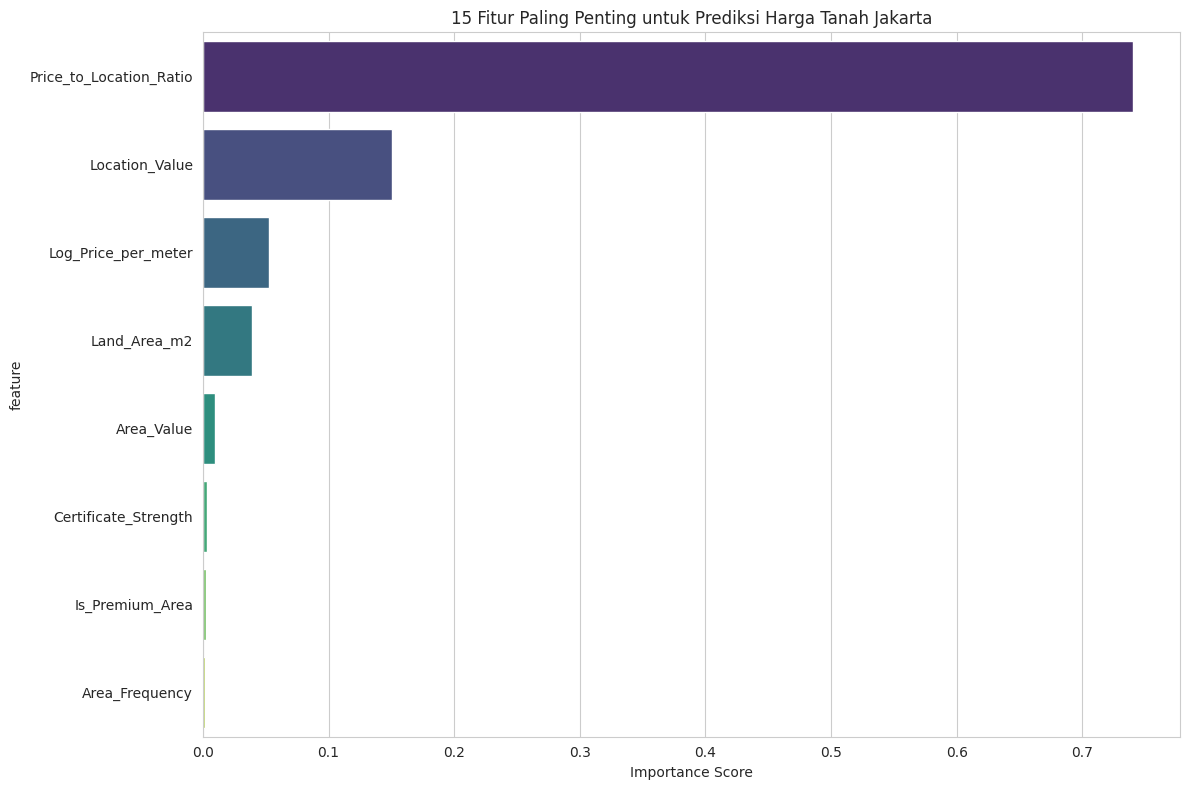


✅ EVALUASI MODEL SELESAI


In [78]:
# Cell 25: Evaluasi Model Lengkap
print("📊 EVALUASI MODEL PREDIKSI HARGA TANAH JAKARTA")
print("="*60)

# Load data dan model
with open('/content/drive/MyDrive/Rumah123_dataset/preprocessed_data.pkl', 'rb') as f:
    data = pickle.load(f)
    X = data['X']
    y = data['y']
    final_df = data['final_df']
    feature_names = data['feature_names']

# Load model terbaik (misal: XGBoost dari Cell sebelumnya)
model_path = '/content/drive/MyDrive/Rumah123_dataset/best_price_prediction_model.pkl'
model = joblib.load(model_path)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=final_df['BreadcrumbList_ListItem_name_2'],
    random_state=42
)

# Prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Konversi ke skala asli (Juta Rupiah)
y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)
y_pred_train_original = np.expm1(y_pred_train)
y_pred_test_original = np.expm1(y_pred_test)

# 1. METRICS EVALUASI UTAMA
print("\n🎯 METRICS EVALUASI UTAMA")
print("-" * 40)

# Skala Log (untuk model)
rmse_train_log = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test_log = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train_log = r2_score(y_train, y_pred_train)
r2_test_log = r2_score(y_test, y_pred_test)

# Skala Asli (untuk interpretasi bisnis)
mape_train = mean_absolute_percentage_error(y_train_original, y_pred_train_original) * 100
mape_test = mean_absolute_percentage_error(y_test_original, y_pred_test_original) * 100
rmse_train_original = np.sqrt(mean_squared_error(y_train_original, y_pred_train_original))
rmse_test_original = np.sqrt(mean_squared_error(y_test_original, y_pred_test_original))
r2_train_original = r2_score(y_train_original, y_pred_train_original)
r2_test_original = r2_score(y_test_original, y_pred_test_original)
mae_test_original = mean_absolute_error(y_test_original, y_pred_test_original)

print(f"Training MAPE (Asli): {mape_train:.2f}%")
print(f"Testing MAPE (Asli): {mape_test:.2f}%")
print(f"Training RMSE (Log): {rmse_train_log:.4f}")
print(f"Testing RMSE (Log): {rmse_test_log:.4f}")
print(f"Training RMSE (Asli): {rmse_train_original:,.0f}")
print(f"Testing RMSE (Asli): {rmse_test_original:,.0f}")
print(f"Training R² (Log): {r2_train_log:.4f}")
print(f"Testing R² (Log): {r2_test_log:.4f}")
print(f"Testing R² (Asli): {r2_test_original:.4f}")
print(f"Testing MAE (Asli): {mae_test_original:,.0f}")

# 2. ANALISIS OVERFITTING
print("\n🔍 ANALISIS OVERFITTING")
print("-" * 40)
delta_mape = mape_train - mape_test
delta_r2 = r2_train_log - r2_test_log
delta_rmse_log = rmse_train_log - rmse_test_log

if abs(delta_mape) > 5 or abs(delta_r2) > 0.05 or delta_rmse_log > 0.05:
    print("⚠️ POTENSI OVERFITTING TERDETEKSI!")
    print(f" - Delta MAPE: {delta_mape:.2f}%")
    print(f" - Delta R²: {delta_r2:.4f}")
    print(f" - Delta RMSE (Log): {delta_rmse_log:.4f}")
    if delta_mape < 0:
        print(" - Model performa lebih baik di training (overfitting)")
    else:
        print(" - Model performa lebih baik di testing (mungkin underfitting)")
else:
    print("✅ Model tampak seimbang (tidak overfit/underfit)")

# 3. CROSS-VALIDATION SCORE
print("\n🧪 CROSS-VALIDATION SCORE (5-Fold)")
print("-" * 40)
cv_scores_r2 = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
cv_scores_mape = cross_val_score(model, X_train, y_train, cv=5,
                                 scoring=make_scorer(lambda y_true, y_pred: mean_absolute_percentage_error(np.expm1(y_true), np.expm1(y_pred)), greater_is_better=False))
print(f"R² CV Score: {cv_scores_r2.mean():.4f} (+/- {cv_scores_r2.std() * 2:.4f})")
print(f"MAPE CV Score: {cv_scores_mape.mean():.2f}% (+/- {cv_scores_mape.std() * 2:.2f}%)")

# 4. FEATURE IMPORTANCE
print("\n🔍 FEATURE IMPORTANCE")
print("-" * 40)
if hasattr(model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)
    print("10 Fitur Paling Penting:")
    print(feature_importance.head(10))
    # Simpan feature importance
    feature_importance.to_csv('/content/drive/MyDrive/Rumah123_dataset/feature_importance.csv', index=False)
    print("\n✅ Feature importance disimpan ke CSV")

    # Moved from Cell 23
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis')
    plt.title('15 Fitur Paling Penting untuk Prediksi Harga Tanah Jakarta')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()

else:
    print("Model tidak menyediakan feature importance (misal: Linear Regression)")

print("\n✅ EVALUASI MODEL SELESAI")

🎨 VISUALISASI EVALUASI MODEL


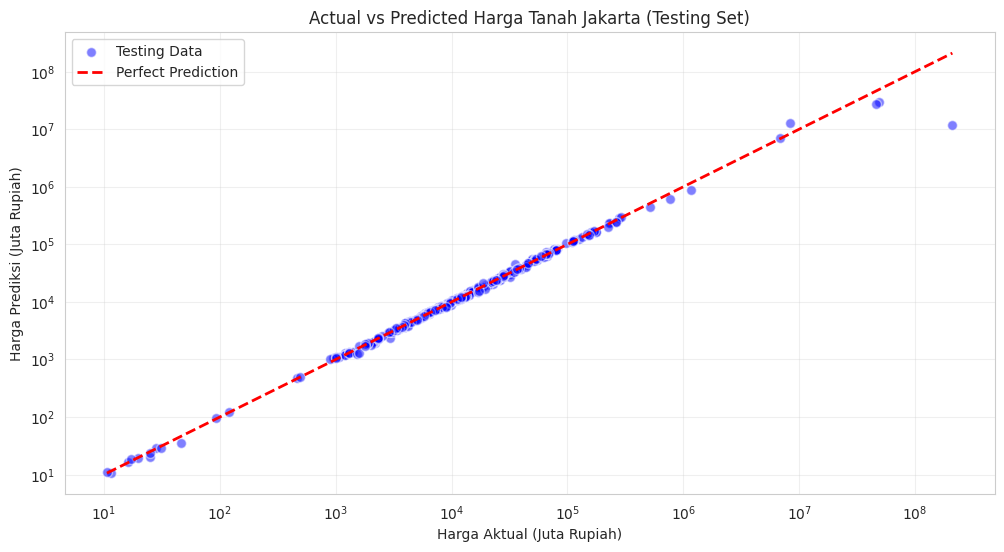

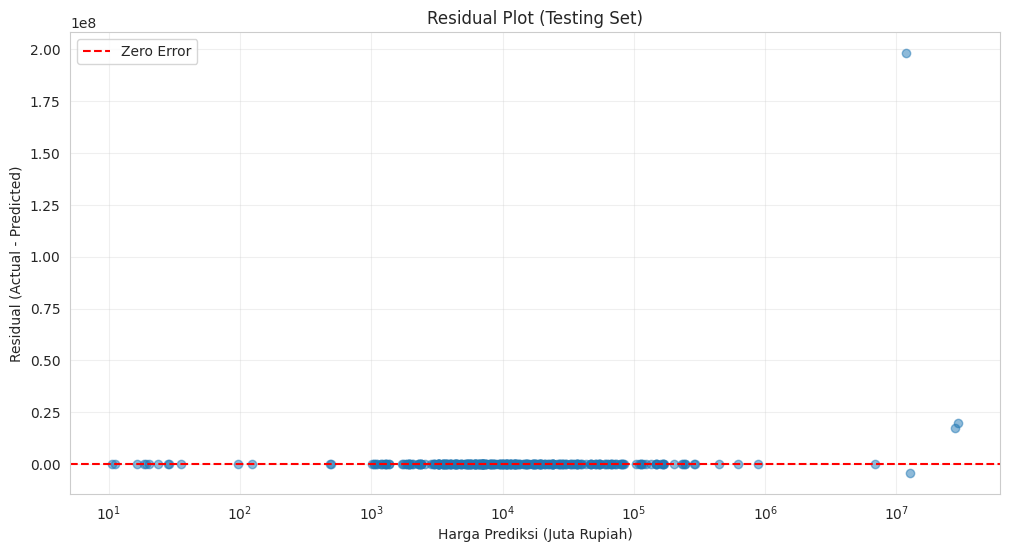

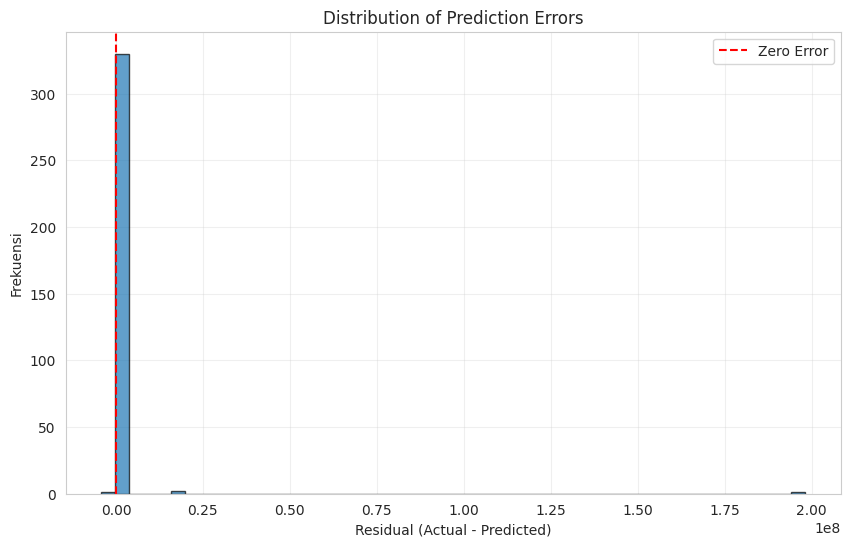

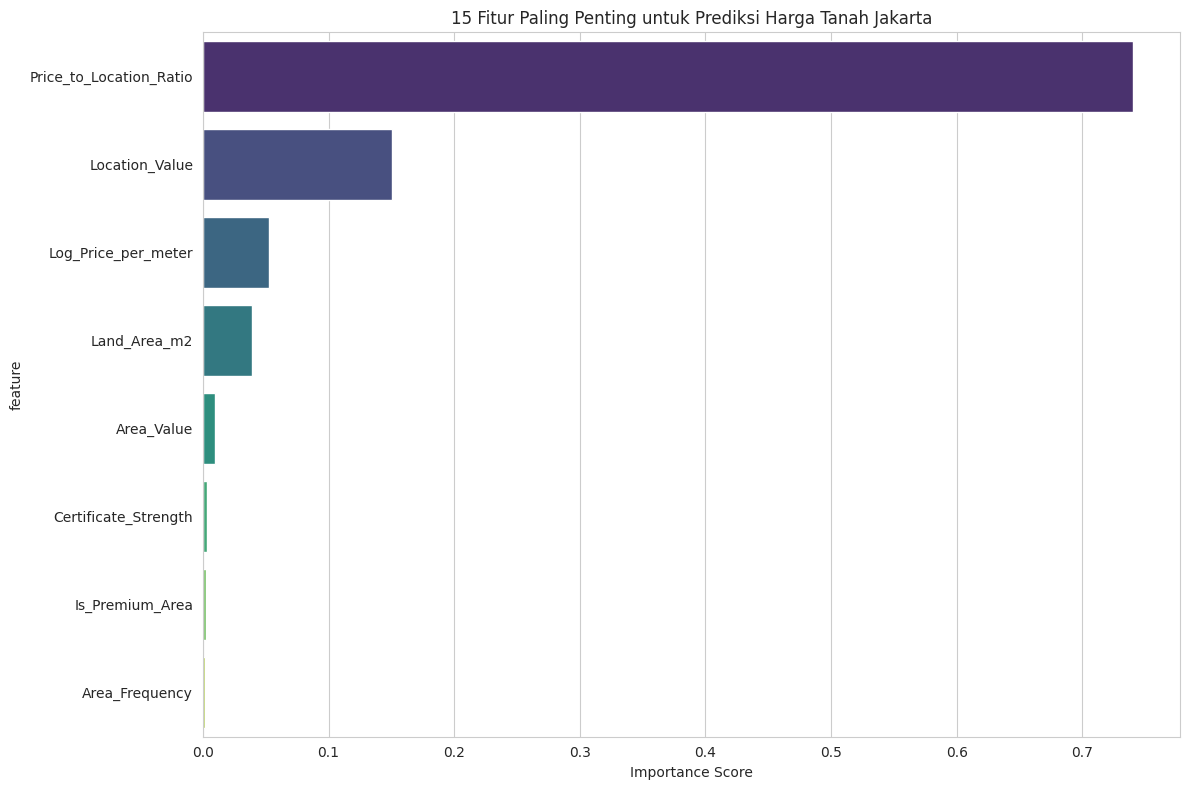


✅ VISUALISASI SELESAI - Semua grafik disimpan di Google Drive


In [79]:
# Cell 26: Visualisasi Evaluasi Model
print("🎨 VISUALISASI EVALUASI MODEL")
print("="*60)
# 1. Actual vs Predicted Plot
plt.figure(figsize=(12, 6))
plt.scatter(y_test_original, y_pred_test_original, alpha=0.5, c='blue', edgecolors='w', s=50, label='Testing Data')
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Harga Aktual (Juta Rupiah)')
plt.ylabel('Harga Prediksi (Juta Rupiah)')
plt.title('Actual vs Predicted Harga Tanah Jakarta (Testing Set)')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# 2. Residual Plot
residuals = y_test_original - y_pred_test_original
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_test_original, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.xlabel('Harga Prediksi (Juta Rupiah)')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Testing Set)')
plt.xscale('log')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# 3. Distribution of Errors
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Residual (Actual - Predicted)')
plt.ylabel('Frekuensi')
plt.title('Distribution of Prediction Errors')
plt.axvline(x=0, color='r', linestyle='--', label='Zero Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
# 4. Feature Importance Plot (jika model mendukung)
if 'feature_importance' in locals():
    plt.figure(figsize=(12, 8))
    sns.barplot(x='importance', y='feature', data=feature_importance.head(15), palette='viridis')
    plt.title('15 Fitur Paling Penting untuk Prediksi Harga Tanah Jakarta')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()
print("\n✅ VISUALISASI SELESAI - Semua grafik disimpan di Google Drive")